In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Twitter Analysis

In [ ]:
df = pd.read_excel("/content/twitter accounts data post elections (1).xlsx")
df.head()

,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,viewsCount,post_url,post_text,Author Handle,accounts_type,sentiment,sentiment reply,sentiment_score,emotion reply,emotion_score
0,tweet,2010980361791024896,https://x.com/MoICT_Ug/status/2010980361791025492,https://twitter.com/MoICT_Ug/status/2010980361...,RT @GCICUganda: As Artificial Intelligence (AI...,RT @GCICUganda: As Artificial Intelligence (AI...,Twitter for iPhone,19,0,34,...,NaN,NaN,NaN,NaN,accounts,NaN,LABEL_1,0.793441,neutral,0.802402
1,tweet,2010973184128884992,https://x.com/MoICT_Ug/status/2010973184128885120,https://twitter.com/MoICT_Ug/status/2010973184...,AI is changing how we interact with informatio...,AI is changing how we interact with informatio...,Twitter for iPhone,11,1,25,...,NaN,https://x.com/MoICT_Ug/status/2010973184128885120,AI is changing how we interact with informatio...,@MoICT_Ug,accounts,NaN,LABEL_1,0.715190,neutral,0.799302
2,tweet,2010725235264560896,https://x.com/MoICT_Ug/status/2010725235264561516,https://twitter.com/MoICT_Ug/status/2010725235...,RT @UCC_Official: Scrolling has become our new...,RT @UCC_Official: Scrolling has become our new...,Twitter for iPhone,20,9,73,...,NaN,NaN,NaN,NaN,accounts,NaN,LABEL_1,0.698276,neutral,0.865495
3,tweet,2010702788402016000,https://x.com/MoICT_Ug/status/2010702788402016344,https://twitter.com/MoICT_Ug/status/2010702788...,"When it matters most, facts matter. Verify inf...","When it matters most, facts matter. Verify inf...",Twitter for iPhone,12,2,16,...,NaN,NaN,NaN,NaN,accounts,NaN,LABEL_1,0.762872,neutral,0.669053
4,tweet,2010630611333956096,https://x.com/MoICT_Ug/status/2010630611333955894,https://twitter.com/MoICT_Ug/status/2010630611...,Join the conversation tonight on @UBCTVUganda’...,Join the conversation tonight on @UBCTVUganda’...,Twitter Web App,5,1,27,...,19397.0,https://x.com/MoICT_Ug/status/2010630611333955894,Join the conversation tonight on @UBCTVUganda’...,@MoICT_Ug,accounts,NaN,LABEL_1,0.741121,neutral,0.936785


In [ ]:
df.columns

Index(['type', 'id', 'url', 'twitterUrl', 'text', 'fullText', 'source',
       'retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x',
       'viewCount', 'createdAt', 'lang', 'bookmarkCount', 'isReply',
       'conversationId_x', 'isPinned', 'author_x', 'extendedEntities', 'card',
       'place', 'entities', 'isRetweet', 'retweet', 'isQuote', 'media_x',
       'isConversationControlled', 'possiblySensitive', 'inReplyToId',
       'inReplyToUserId', 'inReplyToUsername', 'quoteId', 'quote', 'postUrl',
       'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'accounts_type', 'sentiment',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['createdAt'], errors='coerce')
df = df[df['date'] >= '2025-12-01']
df['date']

/tmp/ipython-input-3258534096.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['createdAt'], errors='coerce')


,date
0,2026-01-13 07:40:55+00:00
1,2026-01-13 07:12:23+00:00
2,2026-01-12 14:47:08+00:00
3,2026-01-12 13:17:56+00:00
4,2026-01-12 08:31:08+00:00
...,...
87441,2025-12-03 16:09:23+00:00
87442,2025-12-02 13:44:13+00:00
87443,2025-12-01 18:05:23+00:00
87444,2025-12-01 14:20:02+00:00


## Posts Distribution over time

In [ ]:
posts_df = df.drop_duplicates(subset=['twitterUrl'], keep='first')

# comments_df = df[['postUrl', 'postId',
#        'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
#        'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
#        'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
#        'post_url', 'post_text', 'Author Handle', 'replytext en',
#        'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score']]

comments_df = df[['postUrl', 'postId',
       'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle']]

comments_df = comments_df.dropna(subset=['postUrl'])

posts_df.shape, comments_df.shape

((42163, 59), (2992, 18))

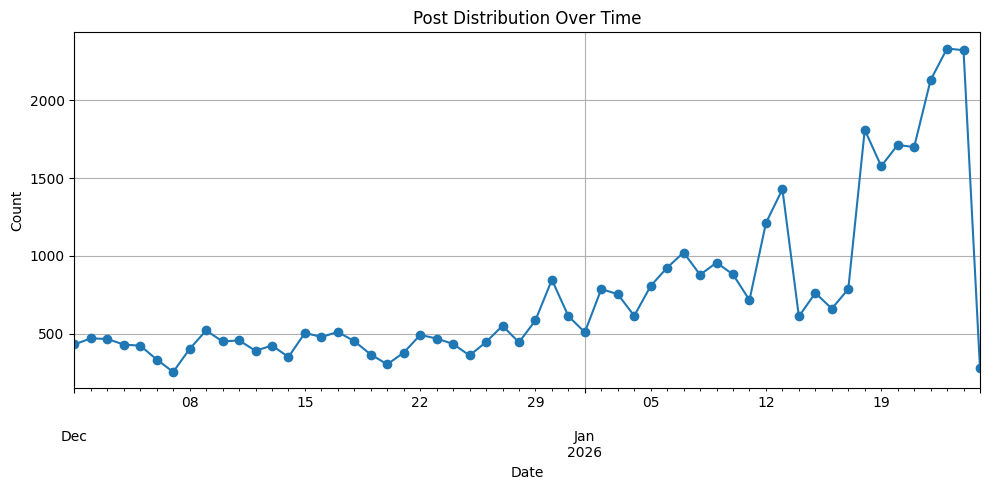

In [ ]:
daily_counts = posts_df.set_index('date').resample('D').size()

# 2. Plot the results
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='line', marker='o')

plt.title('Post Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()

## Who are the most active participants in election-related conversations?


In [ ]:
import pandas as pd
import ast

# Define a function to safely parse the string and get the username
def get_username(val):
    # 1. If it's already a dictionary, just return the value
    if isinstance(val, dict):
        return val.get('userName')

    # 2. If it's a string, try to convert it to a dictionary
    if isinstance(val, str):
        try:
            # literal_eval safely evaluates a string containing a Python literal (like a dict)
            val_dict = ast.literal_eval(val)
            if isinstance(val_dict, dict):
                return val_dict.get('userName')
        except (ValueError, SyntaxError):
            # Return None if the string is malformed
            return None

    # 3. If it's NaN or anything else, return None
    return None

# Apply the function
posts_df['post author'] = posts_df['author_x'].apply(get_username)

# Check the results
print(posts_df['post author'].head())

0    MoICT_Ug
1    MoICT_Ug
2    MoICT_Ug
3    MoICT_Ug
4    MoICT_Ug
Name: post author, dtype: object


/tmp/ipython-input-1960242910.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['post author'] = posts_df['author_x'].apply(get_username)


post author
ubctvuganda        500
KamogaMunawa       500
bbstvug            500
Winnie_Byanyima    500
AAgather           500
ZeeroBrain         500
NathanNuwagira2    500
UGLawyer           500
ssojo81            500
Sambannz           500
Name: count, dtype: int64


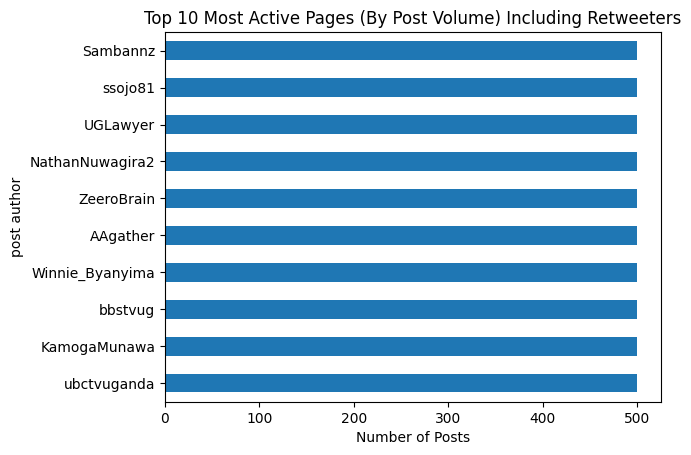

In [ ]:
# Count the number of posts per page/user
top_posters = posts_df['post author'].value_counts().head(10)

print(top_posters)

# Visualization
top_posters.plot(kind='barh', title='Top 10 Most Active Pages (By Post Volume) Including Retweeters')
plt.xlabel('Number of Posts')
plt.show()

### analysis on the original posters

In [ ]:
posts_df['is_actual_post'] = ~posts_df['fullText'].str.startswith('RT @')
posts_df['is_actual_post'].value_counts()

/tmp/ipython-input-4145007354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['is_actual_post'] = ~posts_df['fullText'].str.startswith('RT @')


,count
is_actual_post,
True,23641
False,18522


In [ ]:
original_posts = posts_df[posts_df['is_actual_post']]


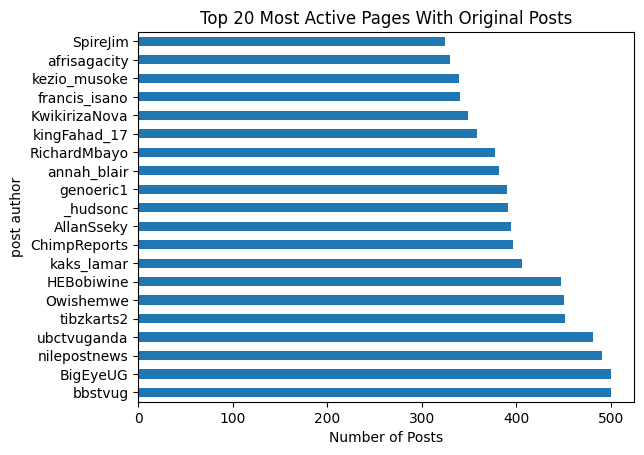

In [ ]:
# Count the number of posts per page/user
top_posters = original_posts['post author'].value_counts().head(20)

# Visualization
top_posters.plot(kind='barh', title='Top 20 Most Active Pages With Original Posts')
plt.xlabel('Number of Posts')
plt.show()

## By Engagement (Impact)

In [ ]:
posts_df = df.drop_duplicates(subset=['twitterUrl'], keep='first')

In [ ]:
posts_df['post author'] = posts_df['author_x'].apply(get_username)


/tmp/ipython-input-2139084222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['post author'] = posts_df['author_x'].apply(get_username)


/tmp/ipython-input-2762091872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)
/tmp/ipython-input-2762091872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['total_engagement'] = posts_df[metrics].sum(axis=1)


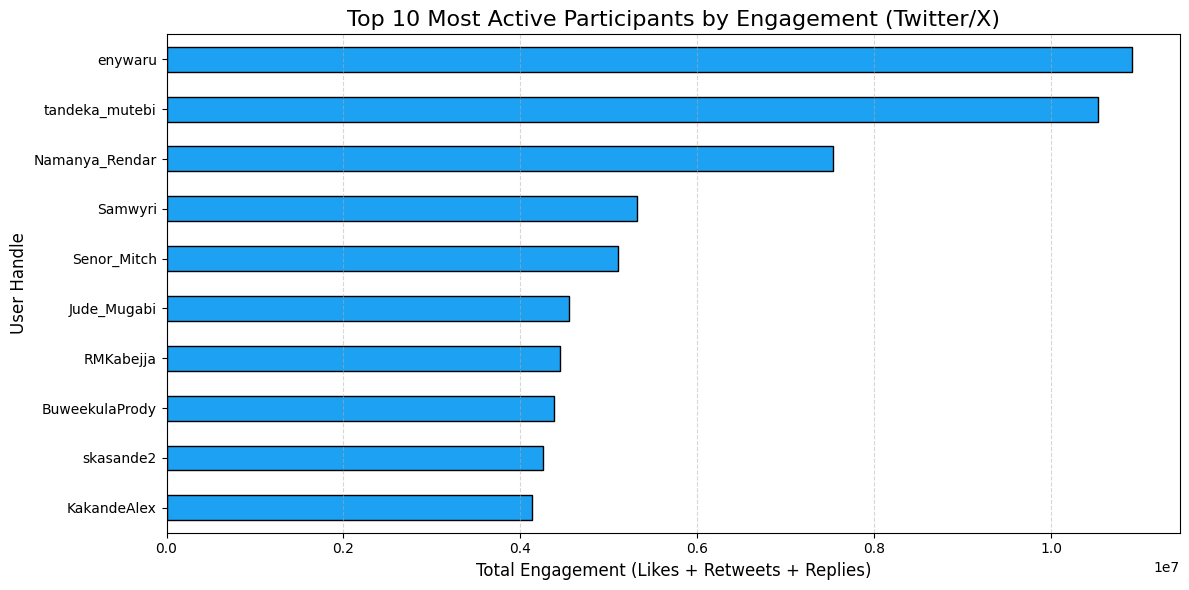

In [ ]:
metrics = ['retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x']

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

posts_df['total_engagement'] = posts_df[metrics].sum(axis=1)

top_engaged = posts_df.groupby('post author')['total_engagement'].sum()

top_10_engaged = top_engaged.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

top_10_engaged.sort_values(ascending=True).plot(
    kind='barh',
    color='#1DA1F2',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement (Twitter/X)', fontsize=16)
plt.xlabel('Total Engagement (Likes + Retweets + Replies)', fontsize=12)
plt.ylabel('User Handle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

### Original posters comparison

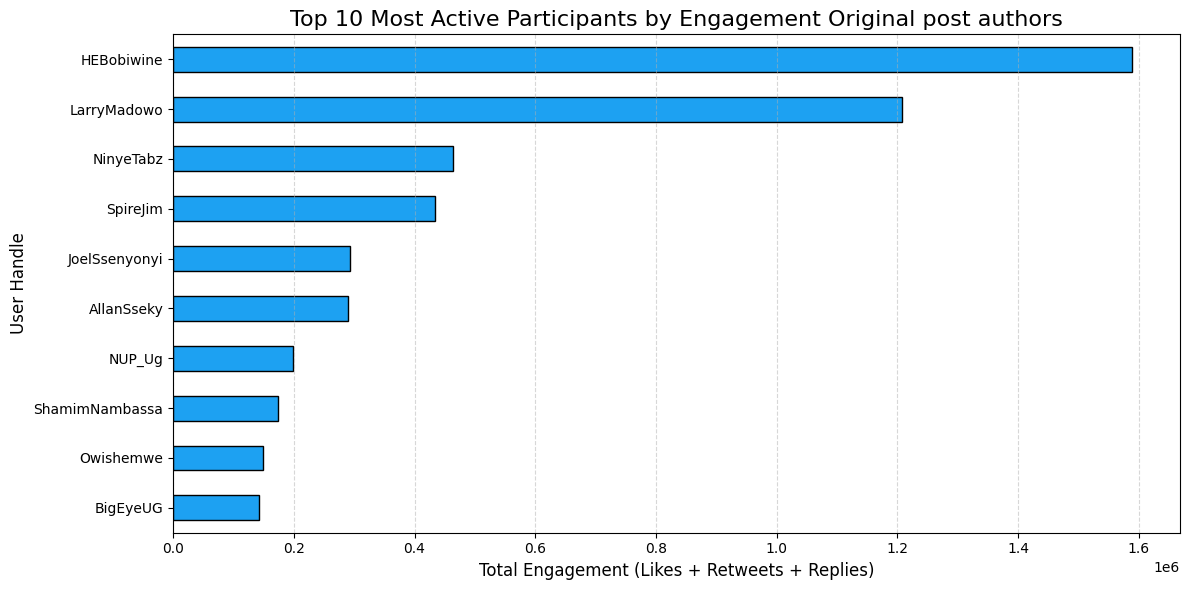

In [ ]:
metrics = ['retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x']

original_posts[metrics] = original_posts[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

original_posts['total_engagement'] = original_posts[metrics].sum(axis=1)

top_engaged = original_posts.groupby('post author')['total_engagement'].sum()

top_10_engaged = top_engaged.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

top_10_engaged.sort_values(ascending=True).plot(
    kind='barh',
    color='#1DA1F2',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement Original post authors', fontsize=16)
plt.xlabel('Total Engagement (Likes + Retweets + Replies)', fontsize=12)
plt.ylabel('User Handle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

## Comparison of engagement through likes, comments and shares

/tmp/ipython-input-1160094894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)


<Figure size 1200x800 with 0 Axes>

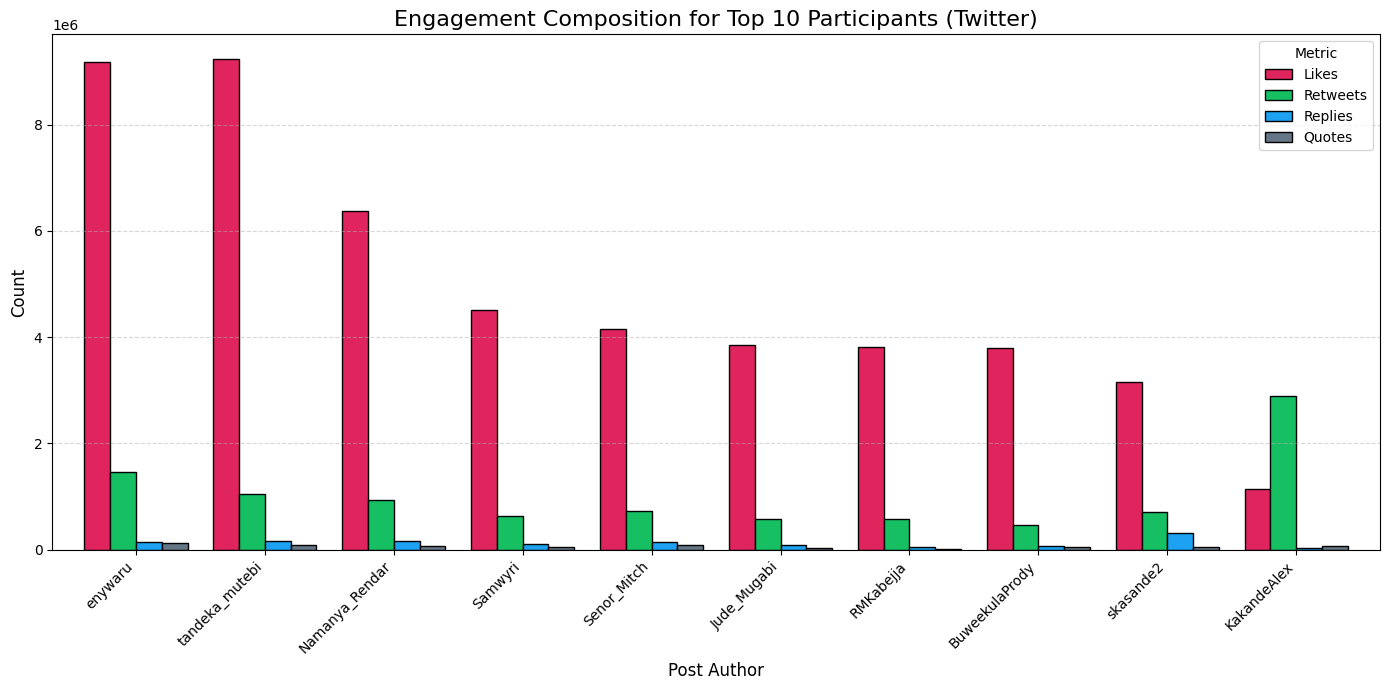

In [ ]:
metrics = ['likeCount', 'retweetCount', 'replyCount_x', 'quoteCount_x']

posts_df[metrics] = posts_df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

author_stats = posts_df.groupby('post author')[metrics].sum()

author_stats['total_sum'] = author_stats.sum(axis=1)
top_10_breakdown = author_stats.sort_values(by='total_sum', ascending=False).head(10)

top_10_breakdown = top_10_breakdown.drop(columns=['total_sum'])

plt.figure(figsize=(12, 8))

colors = ['#E0245E', '#17BF63', '#1DA1F2', '#657786']

top_10_breakdown.plot(
    kind='bar',
    width=0.8,
    figsize=(14, 7),
    color=colors,
    edgecolor='black'
)

plt.title('Engagement Composition for Top 10 Participants (Twitter)', fontsize=16)
plt.xlabel('Post Author', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', labels=['Likes', 'Retweets', 'Replies', 'Quotes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

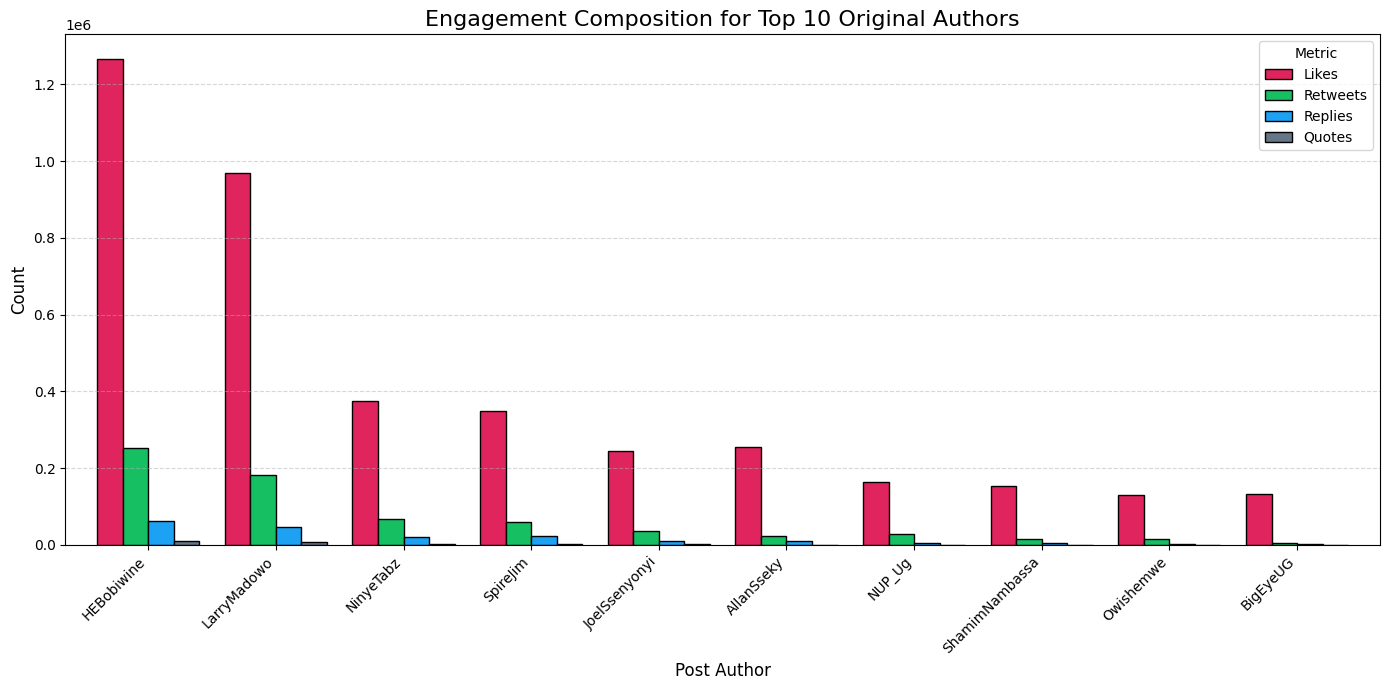

In [ ]:
metrics = ['likeCount', 'retweetCount', 'replyCount_x', 'quoteCount_x']

original_posts[metrics] = original_posts[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

author_stats = original_posts.groupby('post author')[metrics].sum()

author_stats['total_sum'] = author_stats.sum(axis=1)
top_10_breakdown = author_stats.sort_values(by='total_sum', ascending=False).head(10)

top_10_breakdown = top_10_breakdown.drop(columns=['total_sum'])

plt.figure(figsize=(12, 8))

colors = ['#E0245E', '#17BF63', '#1DA1F2', '#657786']

top_10_breakdown.plot(
    kind='bar',
    width=0.8,
    figsize=(14, 7),
    color=colors,
    edgecolor='black'
)

plt.title('Engagement Composition for Top 10 Original Authors', fontsize=16)
plt.xlabel('Post Author', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', labels=['Likes', 'Retweets', 'Replies', 'Quotes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Posts type distribution



In [ ]:
import re

def clean_source(val):
    # Extracts "Twitter for iPhone" from "<a href...>Twitter for iPhone</a>"
    if pd.isna(val): return 'Unknown'
    match = re.search(r'>(.*?)<', str(val))
    return match.group(1) if match else val

def get_username(val):
    # Extracts username from stringified dicts like "{'userName': '...'}"
    if isinstance(val, dict): return val.get('userName')
    try:
        val_dict = ast.literal_eval(str(val))
        if isinstance(val_dict, dict): return val_dict.get('userName')
    except: return None
    return None


posts_df['source_clean'] = posts_df['source'].apply(clean_source)

posts_df['comment_author_handle'] = posts_df['author_y'].apply(get_username)

posts_df['post_date'] = pd.to_datetime(posts_df['date'], errors='coerce')
posts_df['comment_date'] = pd.to_datetime(posts_df['timestamp'], unit='ms', errors='coerce')

def get_post_type(row):
    if row.get('isRetweet') == True: return 'Retweet'
    if row.get('isQuote') == True: return 'Quote Tweet'
    return 'Original Post'

posts_df['post_type_label'] = posts_df.apply(get_post_type, axis=1)

/tmp/ipython-input-2613284237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['source_clean'] = posts_df['source'].apply(clean_source)
/tmp/ipython-input-2613284237.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['comment_author_handle'] = posts_df['author_y'].apply(get_username)
/tmp/ipython-input-2613284237.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

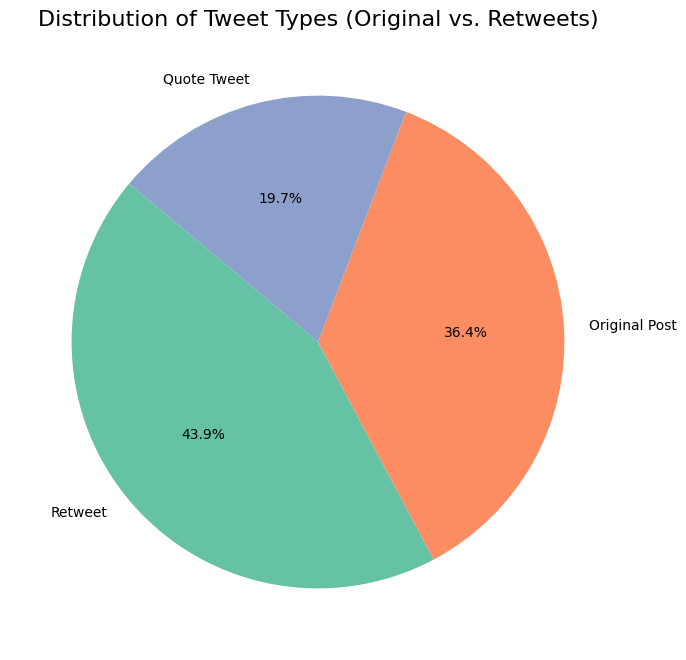

In [ ]:
plt.figure(figsize=(8, 8))
type_counts = posts_df['post_type_label'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
        colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=140)
plt.title('Distribution of Tweet Types (Original vs. Retweets)', fontsize=16)
plt.show()

## Platforms being used


/tmp/ipython-input-1895550957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')


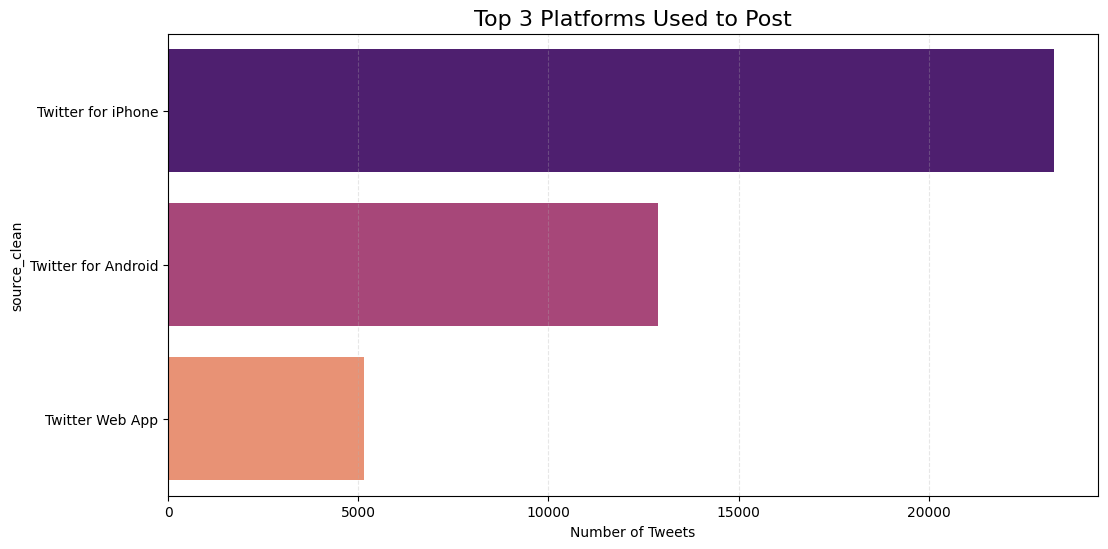

In [ ]:
plt.figure(figsize=(12, 6))
top_sources = posts_df['source_clean'].value_counts().head(3)

sns.barplot(x=top_sources.values, y=top_sources.index, palette='magma')
plt.title('Top 3 Platforms Used to Post', fontsize=16)
plt.xlabel('Number of Tweets')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

# temporal analysis posts vs comments

In [ ]:
comments_df.columns

Index(['postUrl', 'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText',
       'timestamp', 'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle'],
      dtype='object')

In [ ]:
comments_df['comment_date'] = pd.to_datetime(comments_df['timestamp'], unit='ms', errors='coerce')
comments_df['comment_date']

,comment_date
1,2026-01-16 08:00:46
4,2026-01-24 06:00:01
5,2026-01-24 09:00:41
12,2026-01-24 10:42:18
499,2026-01-24 10:42:18
...,...
86986,2025-12-02 17:00:10
86988,2025-12-02 13:34:47
87420,2026-01-19 08:56:43
87421,2026-01-14 07:22:14


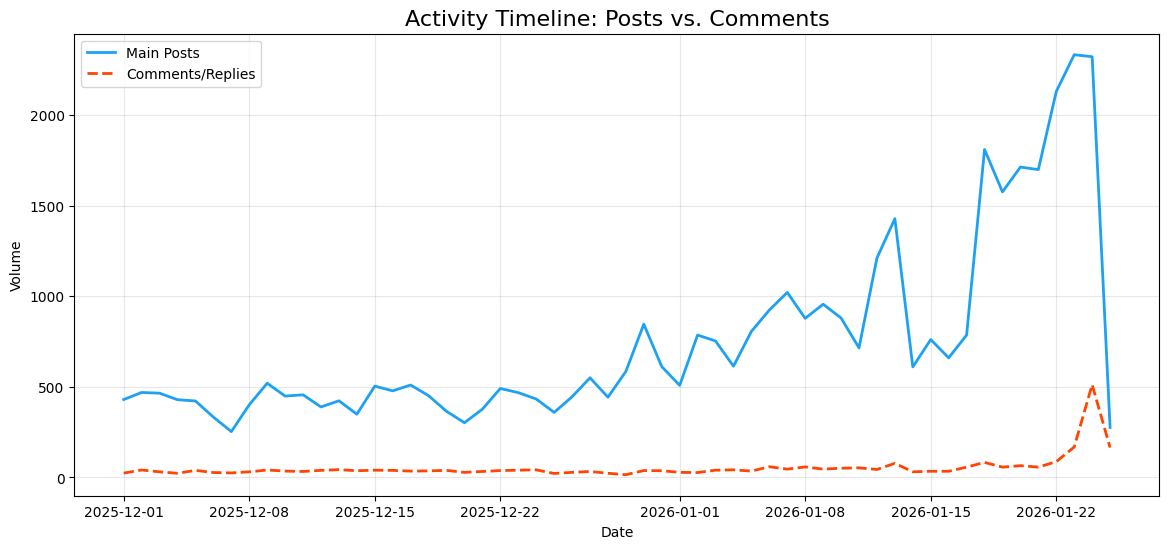

In [ ]:
# Resample by Hour or Day
posts_over_time = posts_df.set_index('post_date').resample('D').size()
comments_over_time = comments_df.set_index('comment_date').resample('D').size()

plt.figure(figsize=(14, 6))
plt.plot(posts_over_time.index, posts_over_time.values, label='Main Posts', color='#1DA1F2', linewidth=2)
plt.plot(comments_over_time.index, comments_over_time.values, label='Comments/Replies', color='#FF4500', linestyle='--', linewidth=2)

plt.title('Activity Timeline: Posts vs. Comments', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Word cloud

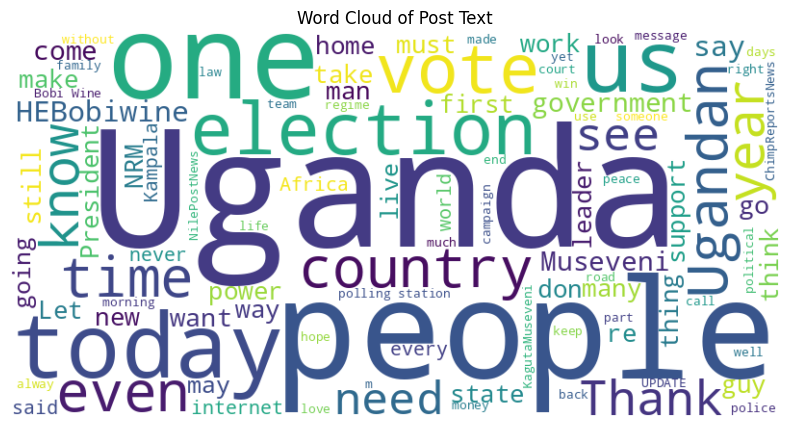

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(df, text_column, title='Word Cloud'):
    """
    Generates and displays a word cloud from a specified text column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        text_column (str): The name of the column containing text data.
        title (str): The title for the word cloud plot. Default is 'Word Cloud'.
    """
    # Combine all text into a single string
    text_content = ' '.join(df[text_column].dropna().astype(str))

    # Define stopwords (you can add more if needed)
    stopwords = set(STOPWORDS)
    stopwords.update(["amp", "RT", "co", "https", "will", "The", "t", "s", "can", "u", "r", "just", "like", "get", "now", "good", "day"])

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        min_font_size=10
    ).generate(text_content)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Call the function for the posts_df 'text' column
generate_word_cloud(posts_df, 'text', title='Word Cloud of Post Text')

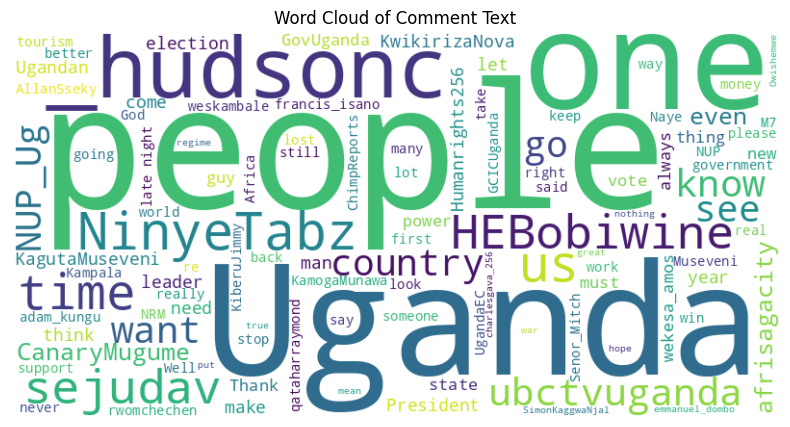

In [ ]:
# comments word cloud

generate_word_cloud(comments_df, 'replyText', title='Word Cloud of Comment Text')

# top commentors

In [ ]:
comments_df['author_y'].iloc[1]

"{'name': 'U.S. Embassy Uganda', 'screenName': 'USEmbassyUganda', 'followersCount': 261031, 'favouritesCount': 7609, 'friendsCount': 7312, 'description': 'Official handle of U.S. Embassy Uganda. The U.S. has enjoyed diplomatic relations with Uganda for 60+ years. https://t.co/CNj09c0eRU'}"

In [ ]:
def extract_comment_handle(val, key: str = "screenName"):
    # 1. Handle missing values (NaN/None)
    if pd.isna(val) or val == "":
        return None

    # 2. If it is already a dictionary, return the screenName
    if isinstance(val, dict):
        return val.get(key)

    # 3. If it is a string, parse it safely
    if isinstance(val, str):
        try:
            val_dict = ast.literal_eval(val)

            if isinstance(val_dict, dict):
                return val_dict.get(key)

        except (ValueError, SyntaxError):
            return None

    return None

# Apply the function to your DataFrame
comments_df['comment_handle'] = comments_df['author_y'].apply(extract_comment_handle)

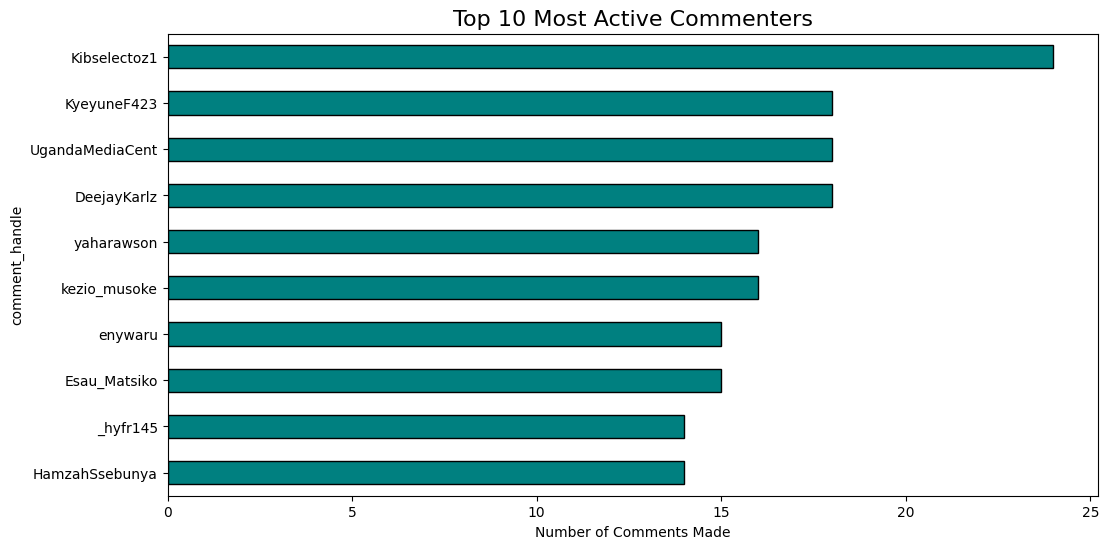

In [ ]:
plt.figure(figsize=(12, 6))
top_commenters = comments_df['comment_handle'].value_counts().head(10)

top_commenters.sort_values().plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Most Active Commenters', fontsize=16)
plt.xlabel('Number of Comments Made')
plt.show()

# hashtags

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def plot_hashtags_bigrams_trigrams(
    df,
    text_col,
    top_n=15,
    stop_words='english'
):
    # ---------- HASHTAGS ----------
    hashtags = (
        df[text_col]
        .dropna()
        .astype(str)
        .str.lower()
        .apply(lambda x: re.findall(r"#(\w+)", x))
        .explode()
        .dropna()
    )

    top_tags = hashtags.value_counts().head(top_n)

    # ---------- N-GRAM FUNCTION ----------
    def extract_ngrams(text_series, n):
        vec = CountVectorizer(
            ngram_range=(n, n),
            stop_words=stop_words,
            max_features=top_n
        )
        bow = vec.fit_transform(text_series)
        sum_words = bow.sum(axis=0)

        ngrams = [
            (word, int(sum_words[0, idx]))
            for word, idx in vec.vocabulary_.items()
        ]

        return (
            pd.DataFrame(ngrams, columns=['Phrase', 'Count'])
            .sort_values('Count', ascending=False)
        )

    # ---------- TEXT CLEANING ----------
    text_clean = (
        df[text_col]
        .fillna('')
        .astype(str)
        .str.lower()
        # remove URLs
        .str.replace(r'https?://\S+', '', regex=True)
        # remove standalone RT
        .str.replace(r'\brt\b', '', regex=True)
        # normalize spaces
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )

    df_bigrams = extract_ngrams(text_clean, 2)
    df_trigrams = extract_ngrams(text_clean, 3)

    # ---------- PLOTTING ----------
    fig, axes = plt.subplots(3, 1, figsize=(16, 18))

    # Hashtags
    sns.barplot(
        x=top_tags.values,
        y=top_tags.index,
        ax=axes[0],
        palette='cool'
    )
    axes[0].set_title(f'Top {top_n} Dominant Hashtags')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel('Hashtag')

    # Bigrams
    sns.barplot(
        data=df_bigrams,
        x='Count',
        y='Phrase',
        ax=axes[1],
        palette='autumn'
    )
    axes[1].set_title(f'Top {top_n} Recurring Narratives (Bigrams)')
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel('Phrase')

    # Trigrams
    sns.barplot(
        data=df_trigrams,
        x='Count',
        y='Phrase',
        ax=axes[2],
        palette='viridis'
    )
    axes[2].set_title(f'Top {top_n} Recurring Narratives (Trigrams)')
    axes[2].set_xlabel('Count')
    axes[2].set_ylabel('Phrase')

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


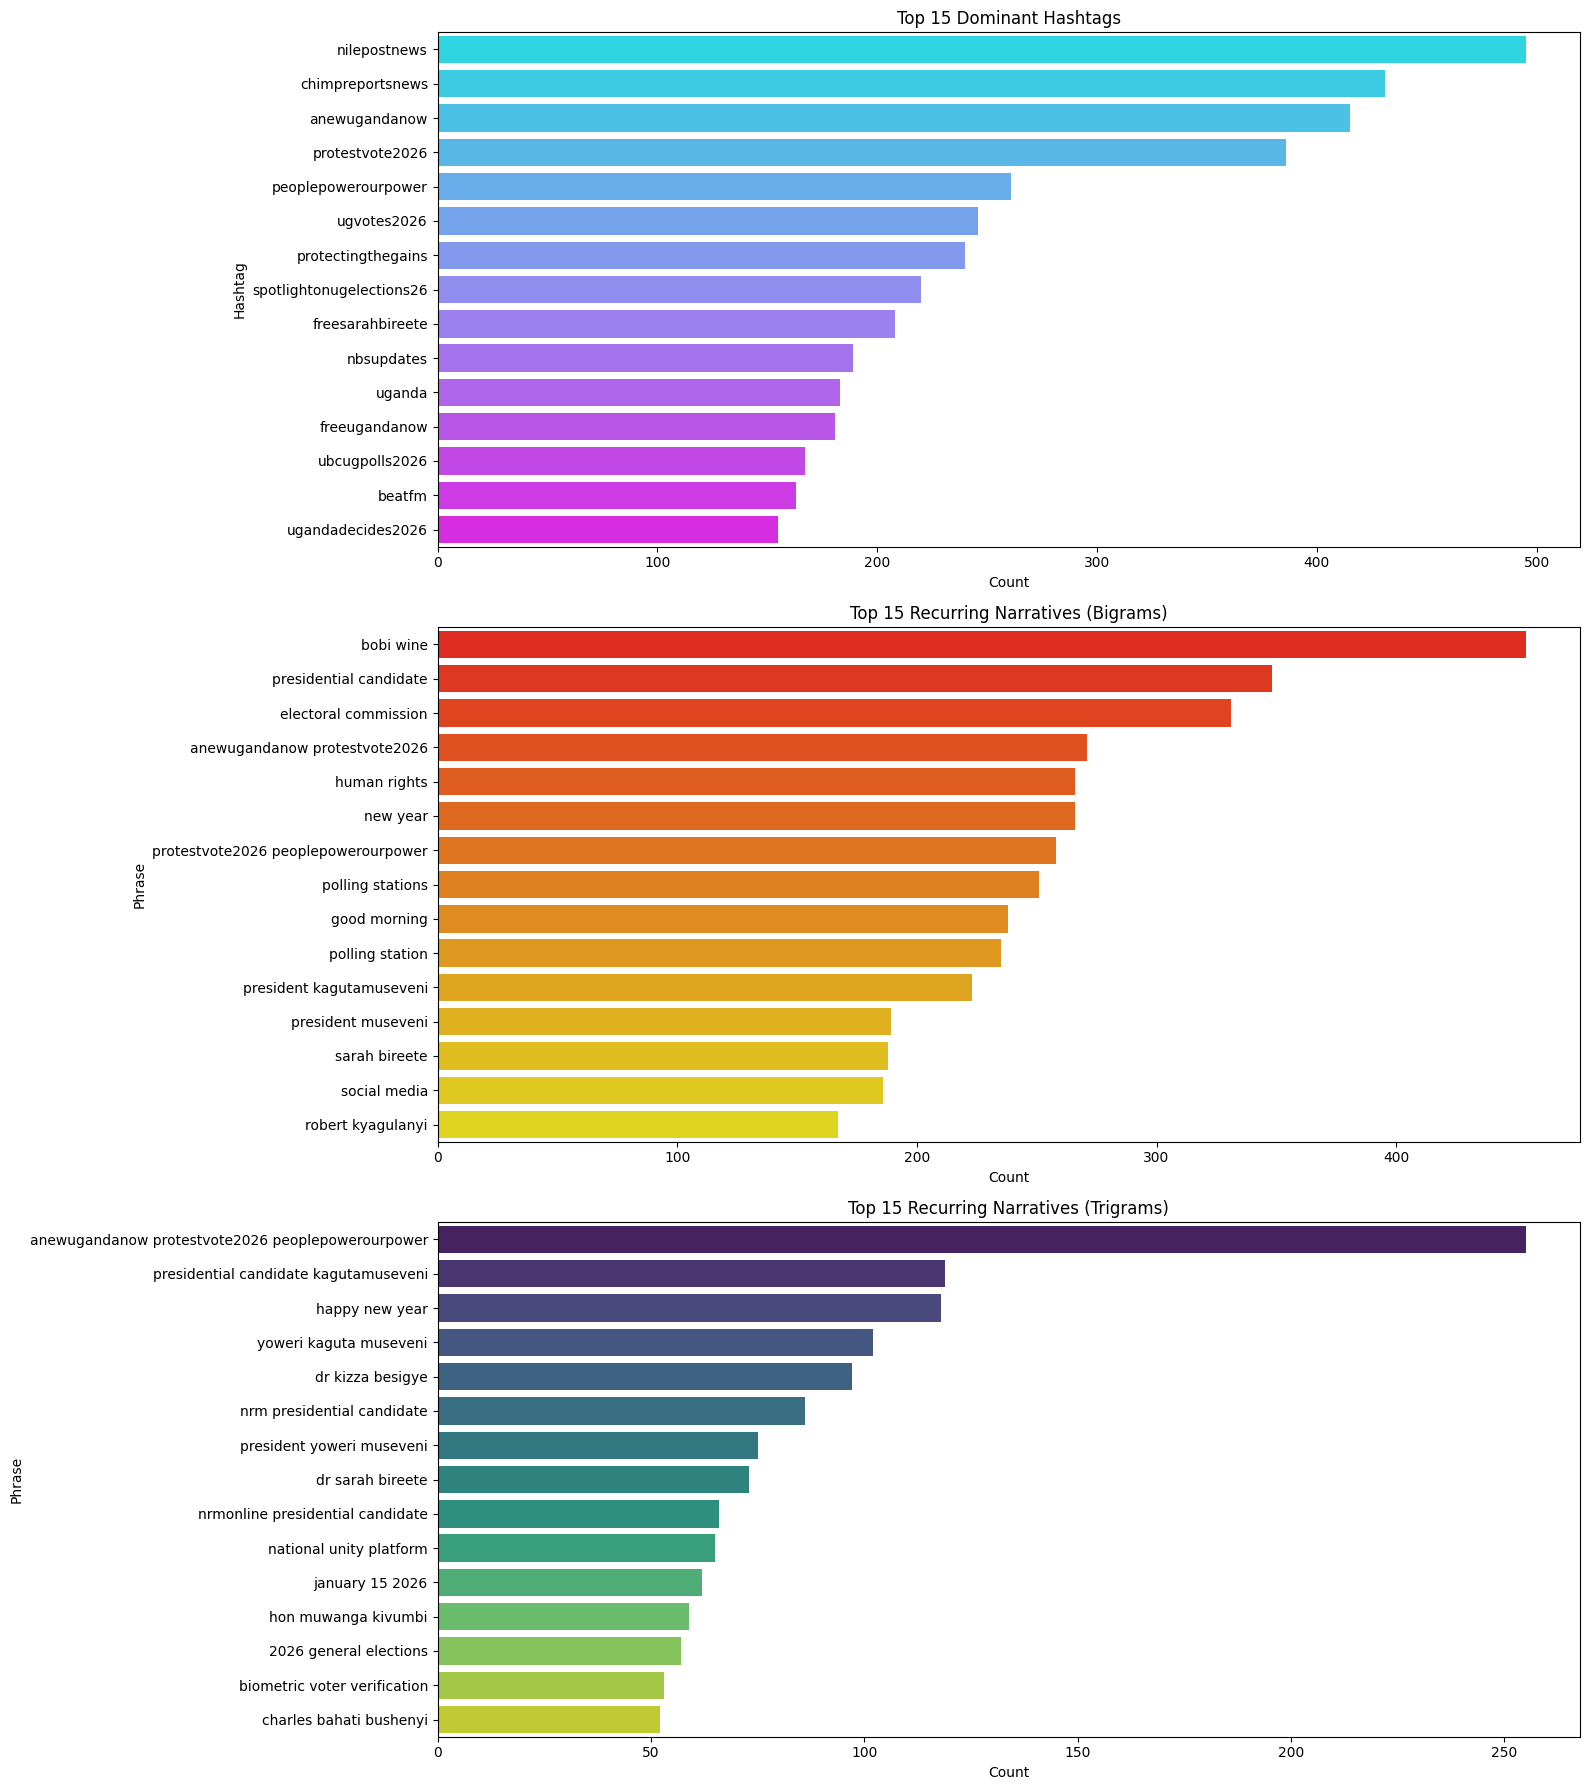

In [ ]:
plot_hashtags_bigrams_trigrams(posts_df, "text")

### comments

/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


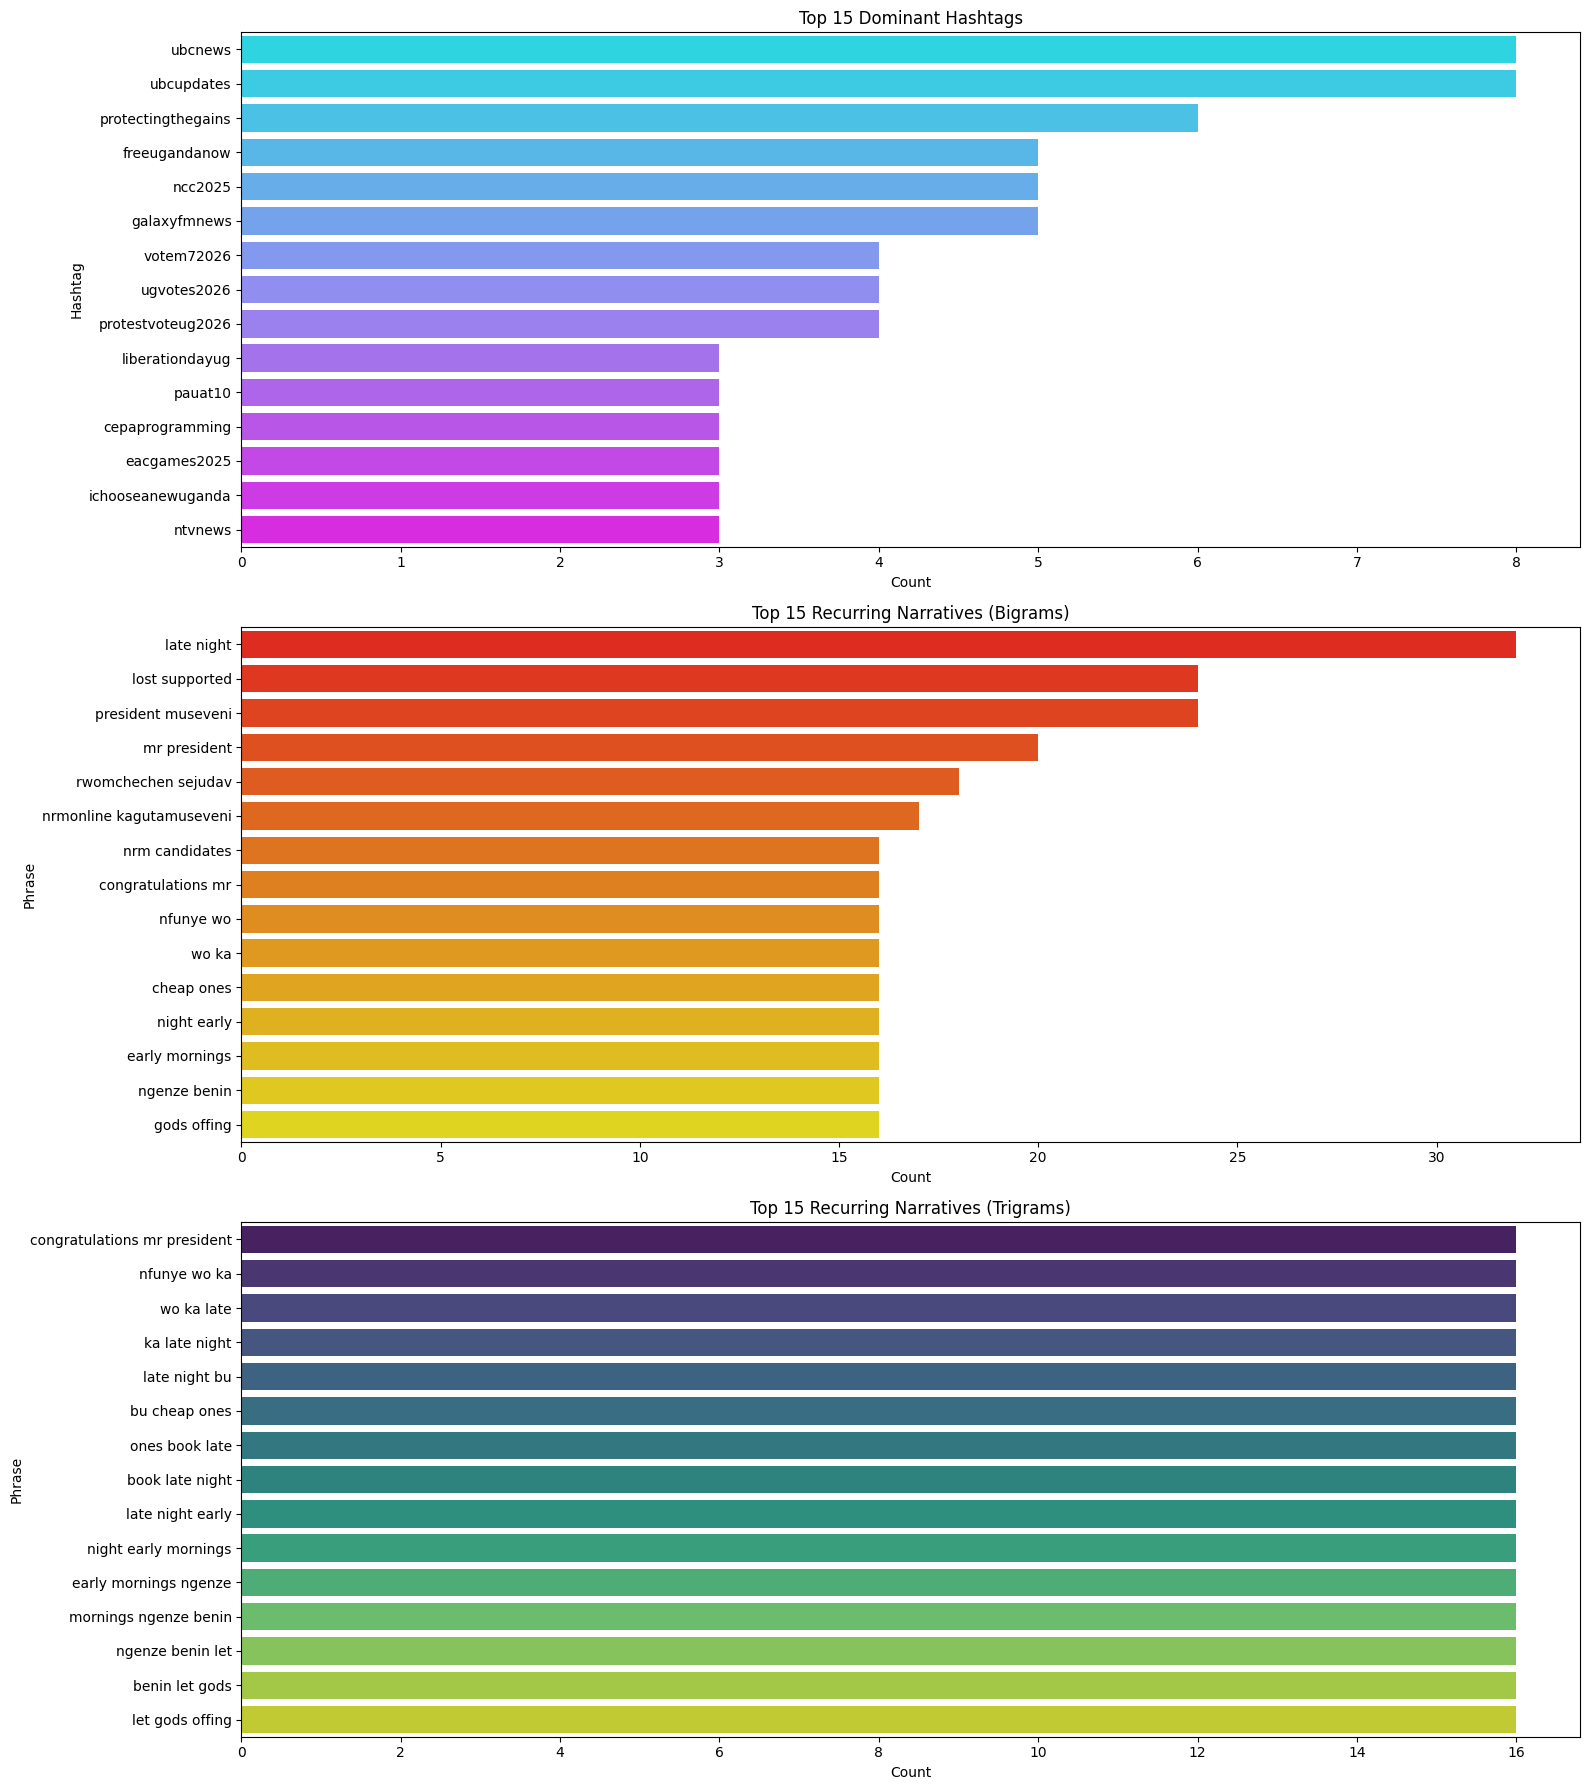

In [ ]:
plot_hashtags_bigrams_trigrams(comments_df, "replyText")

# posts hashtags overtime

In [ ]:
posts_df['hashtags'] = posts_df['text'].apply(lambda x: re.findall(r"#(\w+)", str(x)))
posts_df['hashtags']

/tmp/ipython-input-297914411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['hashtags'] = posts_df['text'].apply(lambda x: re.findall(r"#(\w+)", str(x)))


,hashtags
0,[]
1,[MyVoteMyVoice]
2,[]
3,[]
4,[UBCFrontBench]
...,...
87441,[]
87442,[]
87443,[]
87444,[]


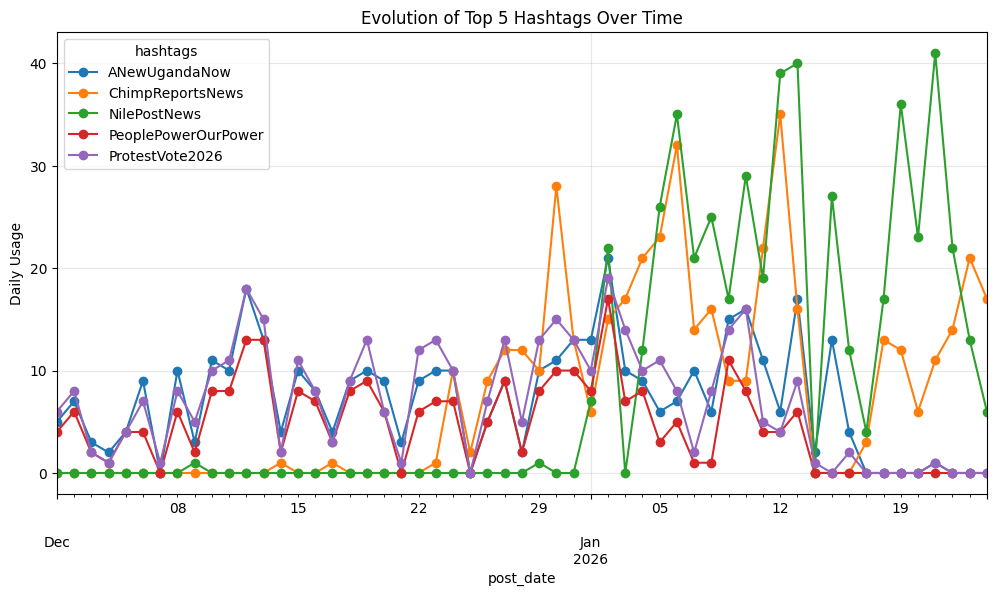

In [ ]:
all_tags = posts_df['hashtags'].explode().dropna()
top_5 = all_tags.value_counts().head(5).index.tolist()

# Filter and explode
df_tags = posts_df[['post_date', 'hashtags']].explode('hashtags')
df_tags = df_tags[df_tags['hashtags'].isin(top_5)]

# Resample
evolution = df_tags.groupby(['post_date', 'hashtags']).size().unstack(fill_value=0).resample('D').sum()

plt.figure(figsize=(12, 6))
evolution.plot(marker='o', ax=plt.gca())
plt.title('Evolution of Top 5 Hashtags Over Time')
plt.ylabel('Daily Usage')
plt.grid(True, alpha=0.3)

## Analysis on political party mention

In [ ]:
eng_metrics = ['likeCount', 'retweetCount', 'replyCount_x', 'quoteCount_x']
for col in eng_metrics:
    posts_df[col] = pd.to_numeric(posts_df[col], errors='coerce').fillna(0)

posts_df['total_engagement'] = posts_df[eng_metrics].sum(axis=1)

# Define the Parties and their Keywords
party_keywords = {
    'NUP': [r'\bnup\b', r'\bbobi wine\b', r'\bbobi\b', r'\bkyagulanyi\b'],
    'NRM': [r'\bnrm\b', r'\byoweri\b', r'\bmuseveni\b', r'\bsevo\b', 'm7'],
    'FDC': [r'\bfdc\b', r'\bbesigye\b'],
    'PDP': [r'\bpdp\b'],
    'DP':  [r'\bdp\b']
}

# Function to check mentions
def check_party_mention(text, patterns):
    if pd.isna(text):
        return 0
    text_lower = str(text).lower()
    for pattern in patterns:
        if re.search(pattern, text_lower):
            return 1
    return 0

# Apply the function to 'fullText'
for party, patterns in party_keywords.items():
    posts_df[f'mention_{party}'] = posts_df['fullText'].apply(lambda x: check_party_mention(x, patterns))

# 5. Aggregate Data
party_stats = []

for party in party_keywords.keys():
    # Filter rows where this party was mentioned
    party_data = posts_df[posts_df[f'mention_{party}'] == 1]

    # Calculate stats
    count = len(party_data)
    avg_eng = party_data['total_engagement'].mean() if count > 0 else 0

    party_stats.append({
        'Party': party,
        'Post_Volume': count,
        'Avg_Engagement': avg_eng
    })

stats_df = pd.DataFrame(party_stats).sort_values(by='Post_Volume', ascending=False)
print(stats_df)

/tmp/ipython-input-1383518603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df[col] = pd.to_numeric(posts_df[col], errors='coerce').fillna(0)
/tmp/ipython-input-1383518603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['total_engagement'] = posts_df[eng_metrics].sum(axis=1)
/tmp/ipython-input-1383518603.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

  Party  Post_Volume  Avg_Engagement
1   NRM         2020     1055.643069
0   NUP         1114     1485.427289
2   FDC          289     1283.813149
4    DP           20      242.000000
3   PDP            4      125.750000


/tmp/ipython-input-1383518603.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df[f'mention_{party}'] = posts_df['fullText'].apply(lambda x: check_party_mention(x, patterns))


/tmp/ipython-input-2998536875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


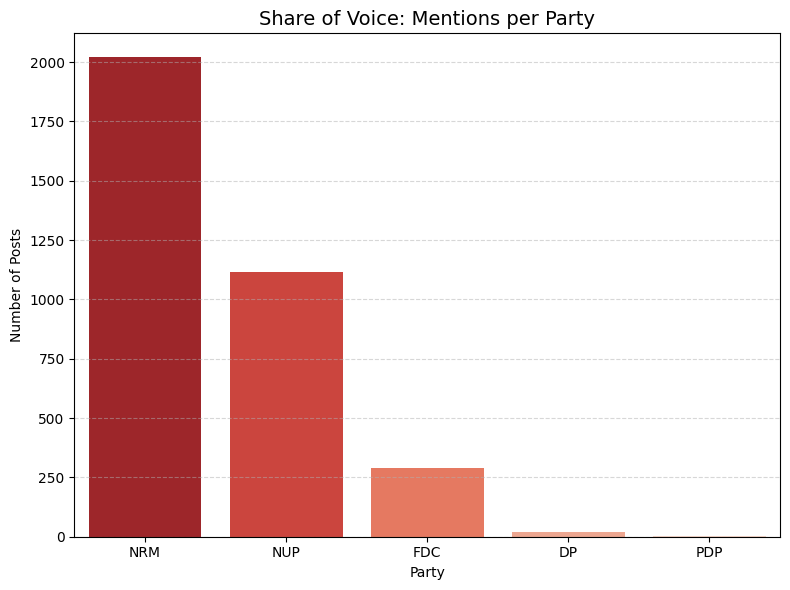

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=stats_df,
    x='Party',
    y='Post_Volume',
    palette='Reds_r'
)

plt.title('Share of Voice: Mentions per Party', fontsize=14)
plt.ylabel('Number of Posts')
plt.xlabel('Party')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-848586865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


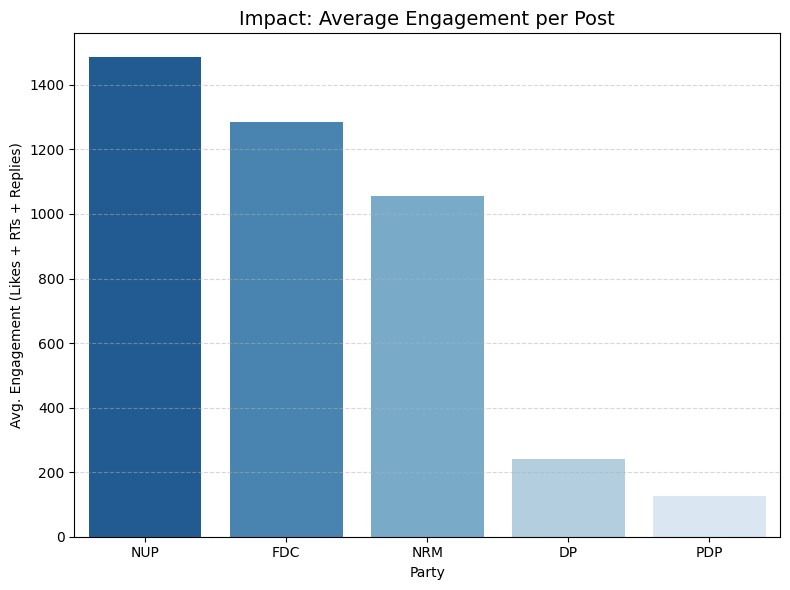

In [ ]:
# Sort by engagement
stats_df_eng = stats_df.sort_values(by='Avg_Engagement', ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(
    data=stats_df_eng,
    x='Party',
    y='Avg_Engagement',
    palette='Blues_r'
)

plt.title('Impact: Average Engagement per Post', fontsize=14)
plt.ylabel('Avg. Engagement (Likes + RTs + Replies)')
plt.xlabel('Party')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Political party Engagement overtime




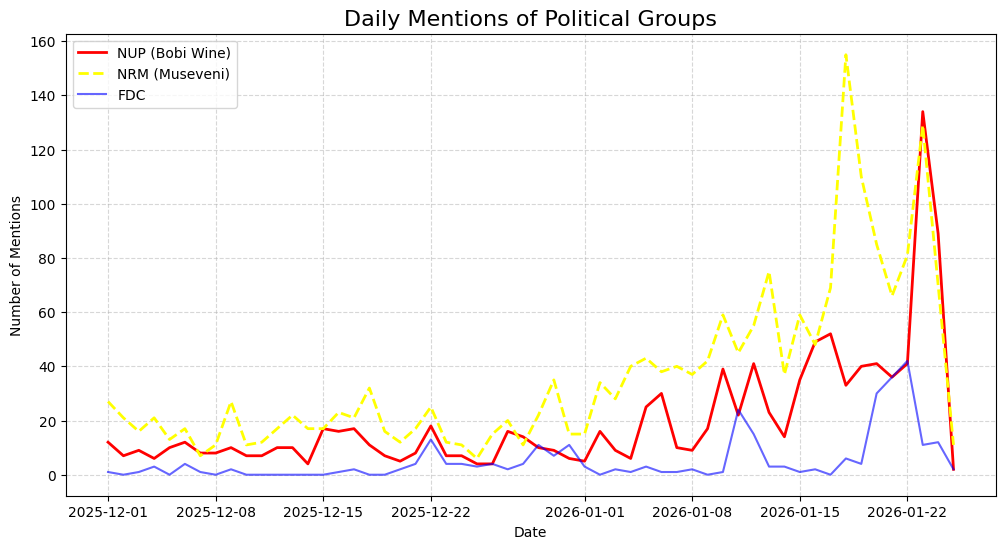

In [ ]:
# Select the party columns + date
df_time = posts_df[['date', 'mention_NUP', 'mention_NRM', 'mention_FDC', 'mention_DP', 'mention_PDP']].copy()

# Set date index and resample by Day or Week
party_time = df_time.set_index('date').resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
# Plotting specific columns
plt.plot(party_time.index, party_time['mention_NUP'], label='NUP (Bobi Wine)', color='red', linewidth=2)
plt.plot(party_time.index, party_time['mention_NRM'], label='NRM (Museveni)', color='yellow', linewidth=2, linestyle='--')
plt.plot(party_time.index, party_time['mention_FDC'], label='FDC', color='blue', alpha=0.6)

plt.title('Daily Mentions of Political Groups', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Bot analysis

In [ ]:
AI_KEYWORDS = [
    "grok", "grok ai", "xai",
    "chatgpt", "gpt", "openai",
    "ai generated", "generated by ai",
    "artificial intelligence"
]

# This wraps every keyword in \b boundaries automatically
# Results in: \bgrok\b|\bgrok ai\b|\bxai\b ...
pattern_string = "|".join([rf"\b{re.escape(k)}\b" for k in AI_KEYWORDS])
pattern = re.compile(pattern_string, re.IGNORECASE)

# Optimized Pandas application
posts_df["mentions_ai"] = posts_df["text"].str.contains(pattern, na=False)

/tmp/ipython-input-3815448332.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df["mentions_ai"] = posts_df["text"].str.contains(pattern, na=False)


In [ ]:
posts_df[posts_df["mentions_ai"]].sample(5)[["date", "text"]]


,date,text
13634,2025-12-07 09:11:58+00:00,I dont think this is an authentic publication ...
21612,2026-01-03 07:36:22+00:00,RT @MKarekye: Grok is jazzing! https://t.co/7P...
65001,2025-12-05 09:52:44+00:00,For Artificial Intelligence(AI) to genuinely t...
77074,2026-01-13 18:22:37+00:00,Hey @grok was coffee really invented in Ethiop...
11593,2026-01-06 19:38:15+00:00,RT @BBCNews: Government demands Musk's X deals...


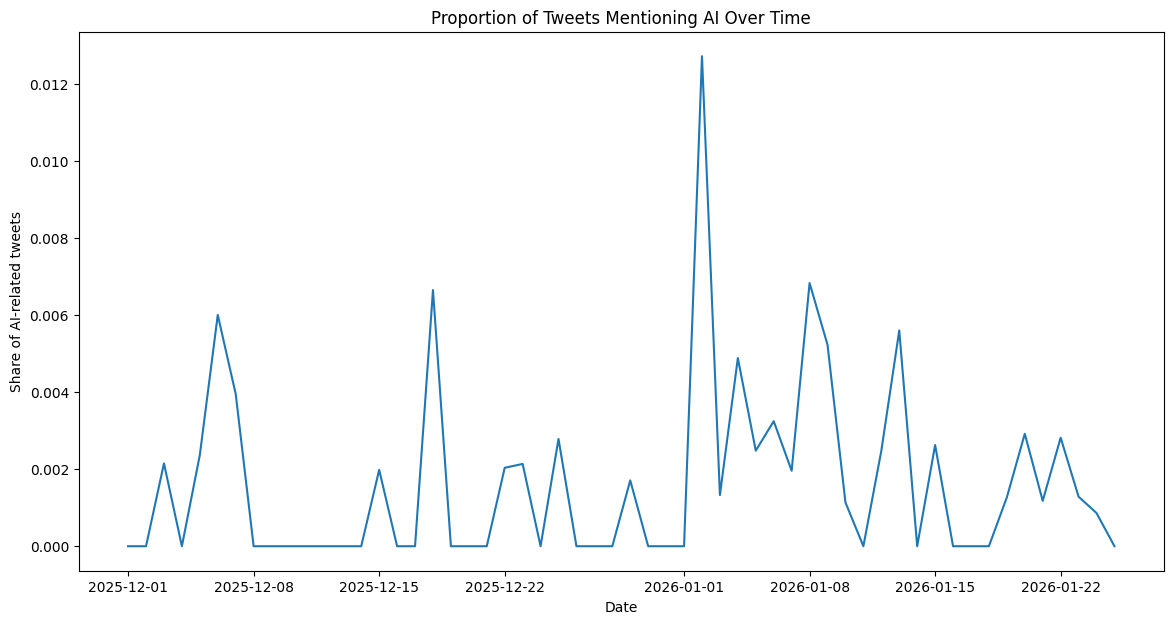

In [ ]:
daily_ai = (
    posts_df
    .groupby(posts_df["date"].dt.date)["mentions_ai"]
    .mean()
)

plt.figure(figsize=(14, 7))
daily_ai.plot()
plt.title("Proportion of Tweets Mentioning AI Over Time")
plt.ylabel("Share of AI-related tweets")
plt.xlabel("Date")
plt.show()

In [ ]:
posts_df[posts_df["mentions_ai"]][['twitterUrl', 'text']].iloc[5].values

array(['https://twitter.com/S_Kahumuza/status/2010689541997220342',
       'RT @BBCBreaking: Investigation into X launched by UK online safety watchdog Ofcom after concern Grok AI being used to create sexualised ima…'],
      dtype=object)

# AI disitrbtion

In [ ]:
AI_PATTERNS = {
    "Grok": r"\bgrok\b|\bxai\b",
    "ChatGPT": r"\bchatgpt\b|\bgpt[- ]?[34]\b|\bopenai\b",
    "Gemini" : r"\bgemini\b|\bnanobanana\b",
    "Claude" : r"\bclaude\b",
    "Other AI": r"\bai generated\b|\bgenerated by ai\b|\bllm\b"
}

def detect_ai_type(text):
    text = str(text).lower()
    for ai, pattern in AI_PATTERNS.items():
        if re.search(pattern, text):
            return ai
    return "No Mention"

posts_df["ai_type"] = posts_df["text"].apply(detect_ai_type)


/tmp/ipython-input-2011772422.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df["ai_type"] = posts_df["text"].apply(detect_ai_type)


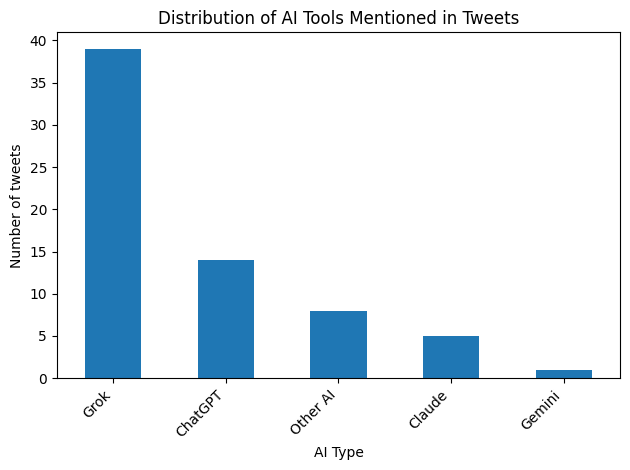

In [ ]:
ai_dist = posts_df[posts_df['ai_type'] != "No Mention"]["ai_type"].value_counts()

# 2. Plotting (without plt.figure() and using savefig)
ai_dist.plot(kind="bar")

plt.title("Distribution of AI Tools Mentioned in Tweets")
plt.ylabel("Number of tweets")
plt.xlabel("AI Type")

# Ensure labels are readable and not truncated
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## overtime mention of ai

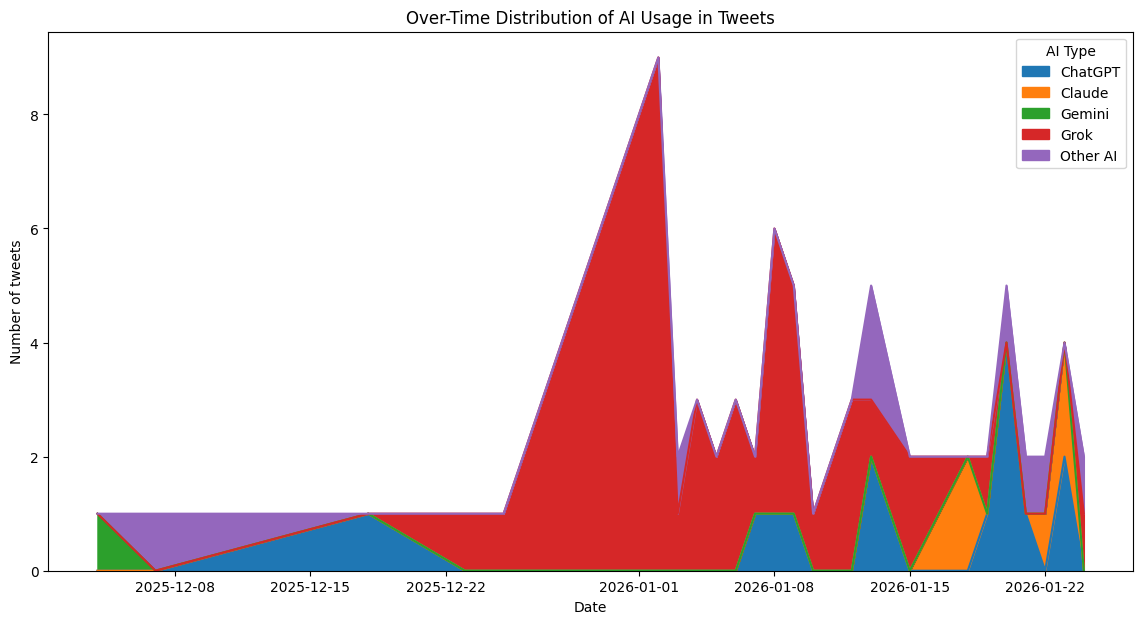

In [ ]:
daily_ai_dist = (
    posts_df[posts_df['ai_type'] != "No Mention"]
    .groupby([posts_df["date"].dt.date, "ai_type"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14, 7))
daily_ai_dist.plot(kind="area", stacked=True, ax=plt.gca())
plt.title("Over-Time Distribution of AI Usage in Tweets")
plt.ylabel("Number of tweets")
plt.xlabel("Date")
plt.legend(title="AI Type")
plt.show()

# Accounts with repeated AI mention

In [ ]:
ai_users = (
    posts_df[posts_df["mentions_ai"]]
    .groupby("post author")
    .size()
    .sort_values(ascending=False)
)

ai_users.head(10)


,0
post author,
KiberuJimmy,6
S_Kahumuza,4
nilepostnews,4
qataharraymond,3
cipesaug,3
kezio_musoke,3
kiizaeron,3
solomonking,3
AdamNuwamanya,3


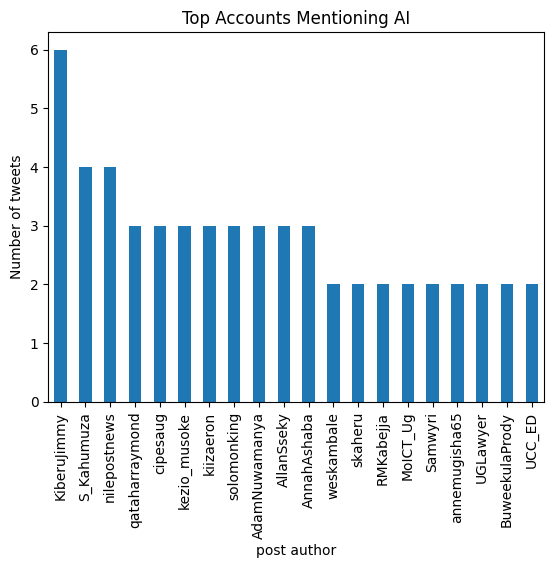

In [ ]:
plt.figure()
ai_users.head(20).plot(kind="bar")
plt.title("Top Accounts Mentioning AI")
plt.ylabel("Number of tweets")
plt.show()


# Topics associated with AI tools

In [ ]:
ai_posts = posts_df[posts_df["ai_type"] != "No Mention"].copy()

ai_posts.shape


(67, 68)

## AI type of requests analysis

## AI manipulation analysis

In [ ]:
from transformers import pipeline
import pandas as pd


In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
AI_USAGE_LABELS = [
    "Topic or information request about a person or event",
    "AI news, policy discussion, or media reporting",
    "Political persuasion or opinion shaping",
    "Content generation request",
    "Image or appearance manipulation request",
    "Sexual or sexualized manipulation using AI",
    "Attack, harassment, or abuse",
    "Other or unclear AI usage"
]


In [ ]:
text = "Government demands Musk's X deals with appalling Grok AI deepfakes"

result = classifier(
    text,
    AI_USAGE_LABELS,
    multi_label=False
)

result


{'sequence': "Government demands Musk's X deals with appalling Grok AI deepfakes",
 'labels': ['Image or appearance manipulation request',
  'Topic or information request about a person or event',
  'Other or unclear AI usage',
  'Content generation request',
  'Attack, harassment, or abuse',
  'AI news, policy discussion, or media reporting',
  'Political persuasion or opinion shaping',
  'Sexual or sexualized manipulation using AI'],
 'scores': [0.40400293469429016,
  0.3746280372142792,
  0.058903321623802185,
  0.04183289408683777,
  0.03744741529226303,
  0.03258291259407997,
  0.028861891478300095,
  0.021740561351180077]}

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def zero_shot_classify(texts, batch_size=8):
    results = []

    for i in tqdm(
        range(0, len(texts), batch_size),
        desc="Zero-shot AI usage classification",
        unit="batch"
    ):
        batch = texts[i:i + batch_size]

        outputs = classifier(
            batch,
            AI_USAGE_LABELS,
            multi_label=False
        )

        for out in outputs:
            results.append(out["labels"][0])

    return results


In [ ]:
ai_posts["ai_usage_zeroshot"] = zero_shot_classify(
    ai_posts["text"].astype(str).tolist(),
    batch_size=8
)


Zero-shot AI usage classification:   0%|          | 0/9 [00:00<?, ?batch/s]

In [ ]:
ai_manipulation_posts = ai_posts[
    (ai_posts["ai_type"] != "No Mention")
]

ai_manipulation_posts.shape


(67, 69)

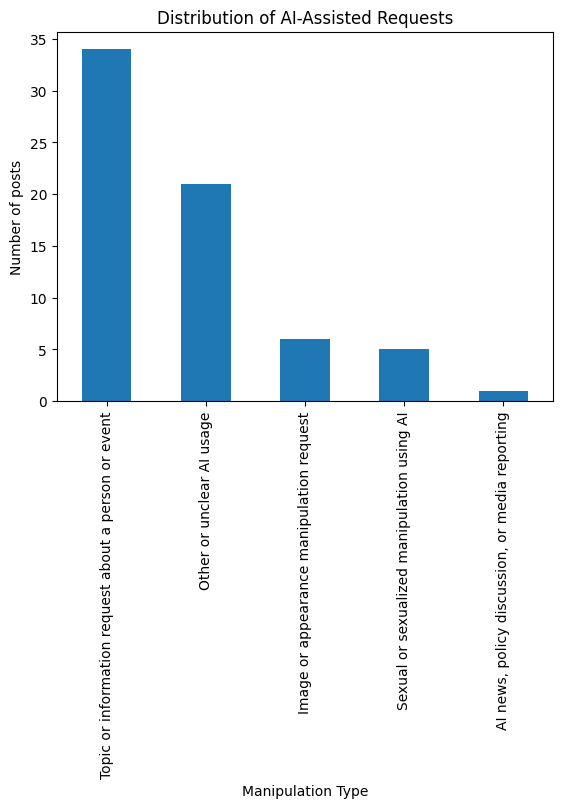

In [ ]:
manip_dist = ai_manipulation_posts["ai_usage_zeroshot"].value_counts()

plt.figure()
manip_dist.plot(kind="bar")
plt.title("Distribution of AI-Assisted Requests")
plt.ylabel("Number of posts")
plt.xlabel("Manipulation Type")
plt.show()


# Sentiment analysis

In [ ]:
posts_df.columns

Index(['type', 'id', 'url', 'twitterUrl', 'text', 'fullText', 'source',
       'retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x',
       'viewCount', 'createdAt', 'lang', 'bookmarkCount', 'isReply',
       'conversationId_x', 'isPinned', 'author_x', 'extendedEntities', 'card',
       'place', 'entities', 'isRetweet', 'retweet', 'isQuote', 'media_x',
       'isConversationControlled', 'possiblySensitive', 'inReplyToId',
       'inReplyToUserId', 'inReplyToUsername', 'quoteId', 'quote', 'postUrl',
       'postId', 'replyId', 'inReplyTo', 'replyUrl', 'replyText', 'timestamp',
       'conversationId_y', 'media_y', 'author_y', 'replyCount_y',
       'quoteCount_y', 'repostCount', 'favouriteCount', 'viewsCount',
       'post_url', 'post_text', 'Author Handle', 'accounts_type', 'sentiment',
       'sentiment reply', 'sentiment_score', 'emotion reply', 'emotion_score',
       'date', 'post author', 'total_engagement', 'source_clean',
       'comment_author_handle', 'post_date', 'comm

In [ ]:
posts_df['sentiment reply'].value_counts()

,count
sentiment reply,
LABEL_1,23355
LABEL_0,10991
LABEL_2,7817


In [ ]:
posts_df['emotion reply'].value_counts()

,count
emotion reply,
neutral,31967
curiosity,1455
gratitude,1302
admiration,1007
approval,938
amusement,762
sadness,561
caring,500
excitement,451


In [ ]:
sentiment_mapping = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}

posts_df['sentiment reply'] = posts_df['sentiment reply'].map(sentiment_mapping)

posts_df.rename(columns={'sentiment reply': 'post sentiment'}, inplace=True)

posts_df['post sentiment'].value_counts()

/tmp/ipython-input-700293033.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['sentiment reply'] = posts_df['sentiment reply'].map(sentiment_mapping)
/tmp/ipython-input-700293033.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df.rename(columns={'sentiment reply': 'post sentiment'}, inplace=True)


,count
post sentiment,
Neutral,23355
Negative,10991
Positive,7817


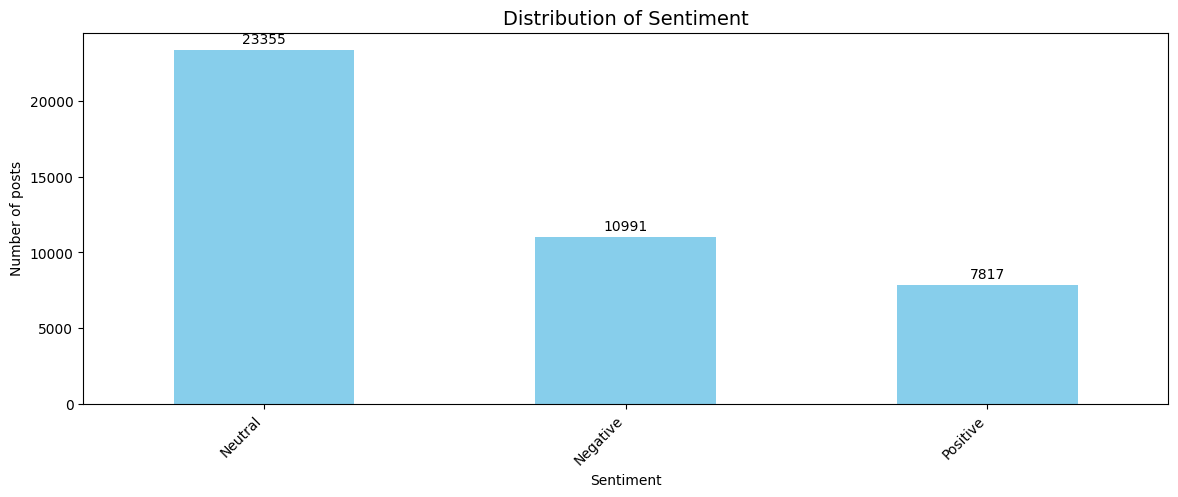

In [ ]:

# 1. Get the distribution
manip_dist = posts_df["post sentiment"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Sentiment", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()


### sentiment distribution overtime

In [ ]:
# sentiment disitrbti
posts_df['week'] = posts_df['date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_counts = (
    posts_df.groupby(['week', 'post sentiment'])
      .size()
      .reset_index(name='count')
)


/tmp/ipython-input-3147471285.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts_df['week'] = posts_df['date'].dt.to_period('W').apply(lambda r: r.start_time)
/tmp/ipython-input-3147471285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['week'] = posts_df['date'].dt.to_period('W').apply(lambda r: r.start_time)


In [ ]:
weekly_leader = (
    weekly_counts
    .sort_values(['week', 'count'], ascending=[True, False])
    .drop_duplicates('week')
)

# weekly_leader now has one sentiment per week
print(weekly_leader.head())


         week post sentiment  count
1  2025-12-01        Neutral   1549
4  2025-12-08        Neutral   1626
7  2025-12-15        Neutral   1659
10 2025-12-22        Neutral   1691
13 2025-12-29        Neutral   2622


<Axes: xlabel='week'>

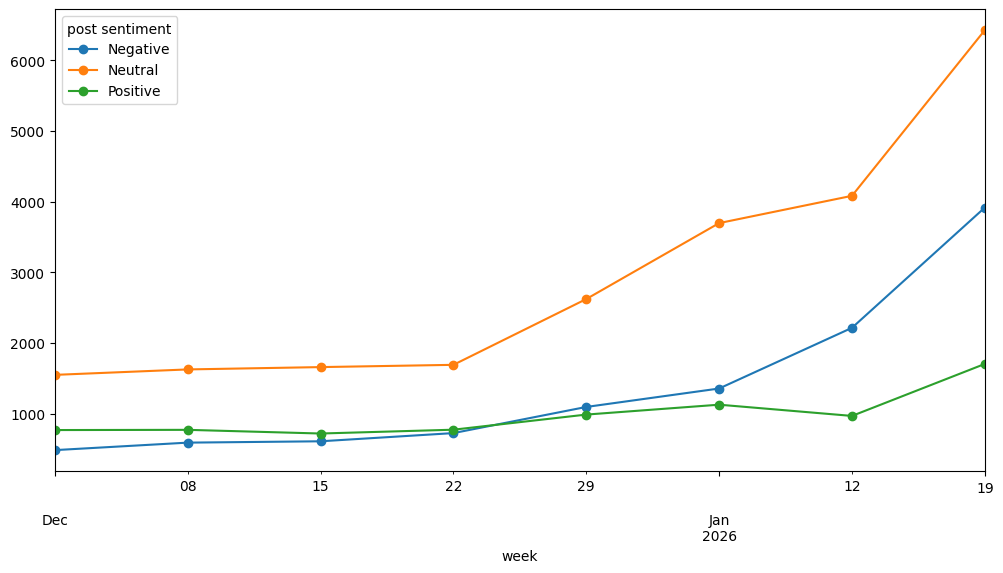

In [ ]:
weekly_pivot = weekly_counts.pivot(
    index='week',
    columns='post sentiment',
    values='count'
).fillna(0)

weekly_pivot.plot(kind='line', marker='o', figsize=(12,6))

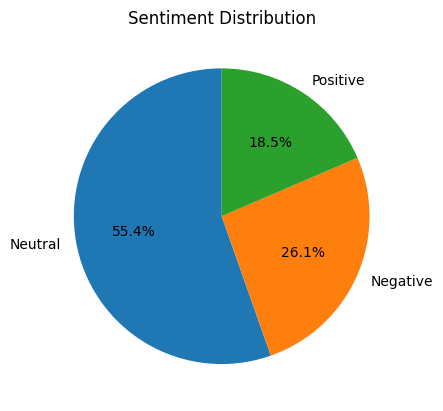

In [ ]:
posts_df['post sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.ylabel('')  # removes default ylabel
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
posts_df[posts_df['post sentiment'] == 'Positive']['text'].iloc[40]

'Young Ugandan-born candidate of Indian origin, Shyam Jay Tanna, has made history by winning the Tororo Municipality parliamentary seat.\nLink: https://t.co/0xw4EDb4yb\n#UBCNews | #UBCUpdates https://t.co/czV3hRB6DH'

## Author sentiment distribution

In [ ]:
author_sent = (
    posts_df.groupby(['post author', 'post sentiment'])
      .size()
      .unstack(fill_value=0)
)

author_sent.head()


post sentiment,Negative,Neutral,Positive
post author,,,
0000Mats,36,73,22
AAgather,214,249,37
AdamNuwamanya,42,81,49
AfricanIIJ,0,0,1
AgoraCFR,76,164,21


In [ ]:
top_negative = author_sent.sort_values('Negative', ascending=False).head(10)

In [ ]:
top_negative

post sentiment,Negative,Neutral,Positive
post author,,,
dangbanamanager,249,213,38
skasande2,240,238,22
AnnahAshaba,233,217,50
RMKabejja,232,226,40
afrisagacity,225,210,59
AAgather,214,249,37
KiberuJimmy,212,230,57
ssojo81,210,270,20
_hudsonc,209,201,43


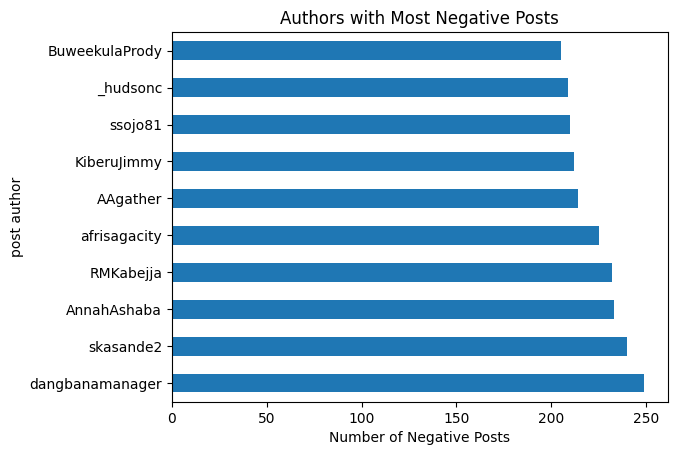

In [ ]:
top_negative['Negative'].plot(kind='barh')
plt.title('Authors with Most Negative Posts')
plt.xlabel('Number of Negative Posts')
plt.show()


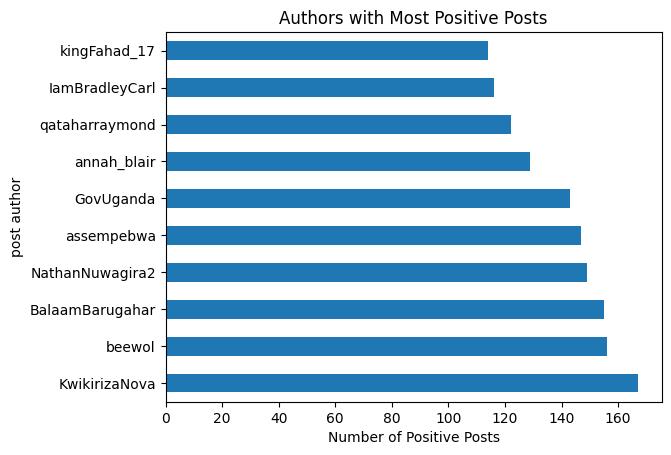

In [ ]:
top_positive = (
    author_sent
    .drop(index='SafeBoda', errors='ignore')
    .sort_values('Positive', ascending=False)
    .head(10)
)

top_positive['Positive'].plot(kind='barh')
plt.title('Authors with Most Positive Posts')
plt.xlabel('Number of Positive Posts')
plt.show()


## Key topics

In [ ]:
def extract_hashtags(text):
    if pd.isna(text):
        return []
    return re.findall(r'#\w+', text.lower())

posts_df['hashtags'] = posts_df['text'].apply(extract_hashtags)

/tmp/ipython-input-2516354029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_df['hashtags'] = posts_df['text'].apply(extract_hashtags)


In [ ]:
posts_df[posts_df['sentiment'] == 'Negative']

,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,date,post author,total_engagement,source_clean,comment_author_handle,post_date,comment_date,post_type_label,week,hashtags


In [ ]:
def get_bigrams(corpus):
    vec = CountVectorizer(
        ngram_range=(2,2),
        stop_words='english',
        min_df=5  # IMPORTANT: remove noise
    )
    X = vec.fit_transform(corpus)
    return pd.Series(
        X.sum(axis=0).A1,
        index=vec.get_feature_names_out()
    ).sort_values(ascending=False)


In [ ]:
def hashtag_distribution(df, sentiment, top_n=15):
    return (
        df[df['post sentiment'] == sentiment]
        .explode('hashtags')
        .dropna(subset=['hashtags'])
        ['hashtags']
        .value_counts()
        .head(top_n)
    )


In [ ]:
pos_hashtags = hashtag_distribution(posts_df, 'Positive')
neg_hashtags = hashtag_distribution(posts_df, 'Negative')


In [ ]:
pos_hashtags

,count
hashtags,
#protectingthegains,138
#anewugandanow,131
#protestvote2026,101
#unstoppableug,84
#peoplepowerourpower,79
#opengovug,57
#eacgames2025,49
#visituganda,49
#ugvotes2026,39


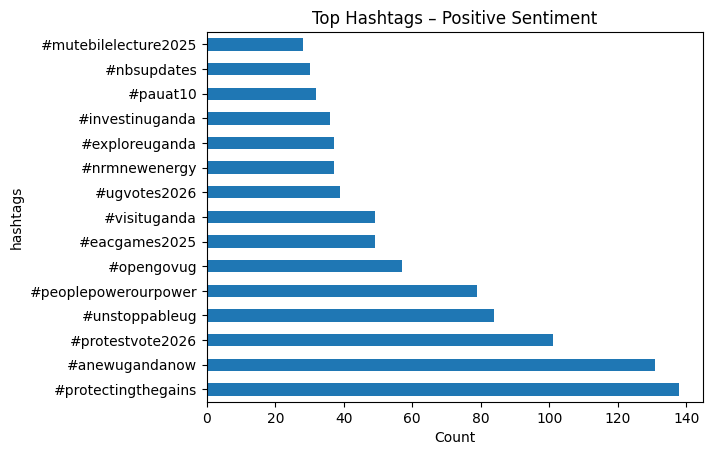

In [ ]:
pos_hashtags.plot(kind='barh')
plt.title('Top Hashtags – Positive Sentiment')
plt.xlabel('Count')
plt.show()


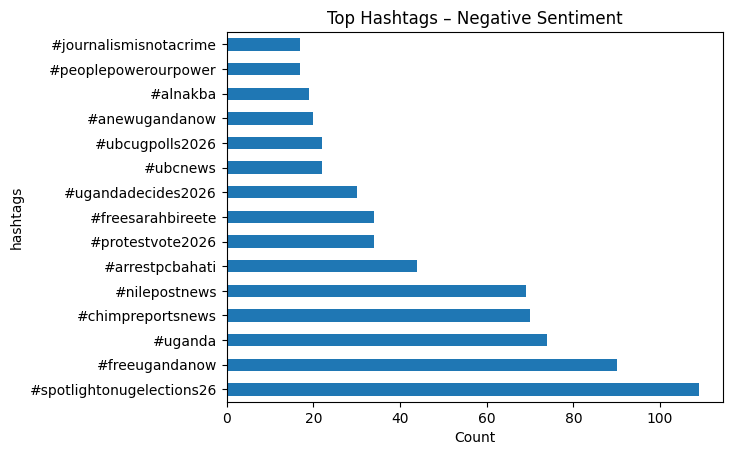

In [ ]:

neg_hashtags.plot(kind='barh')
plt.title('Top Hashtags – Negative Sentiment')
plt.xlabel('Count')
plt.show()


In [ ]:
non_retweet_posts = posts_df[posts_df['post_type_label'] != 'Retweet']

pos_bigrams = get_bigrams(
    non_retweet_posts[non_retweet_posts['post sentiment'] == 'Positive']['text']
)

neg_bigrams = get_bigrams(
    non_retweet_posts[non_retweet_posts['post sentiment'] == 'Negative']['text']
)


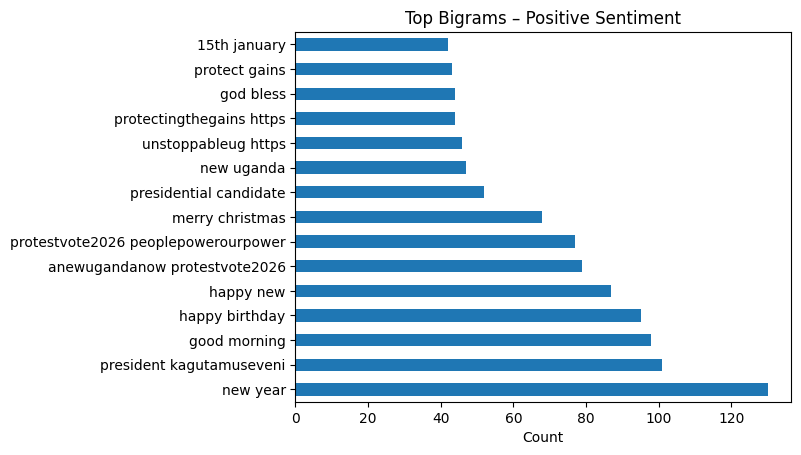

In [ ]:
pos_bigrams.head(15).plot(kind='barh')
plt.title('Top Bigrams – Positive Sentiment')
plt.xlabel('Count')
plt.show()

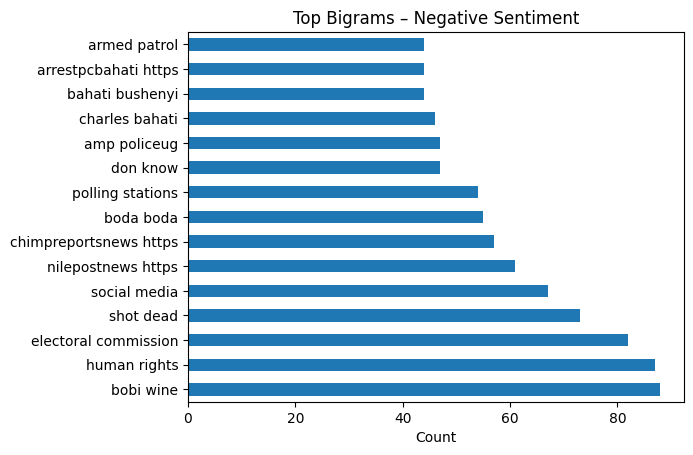

In [ ]:


neg_bigrams.head(15).plot(kind='barh')
plt.title('Top Bigrams – Negative Sentiment')
plt.xlabel('Count')
plt.show()


## MK analysis

In [ ]:
mk_mentions_posts = posts_df[posts_df['text'].str.contains('mkainerugaba|muhoozi', case=False, na=False)]
mk_mentions_posts = mk_mentions_posts.drop_duplicates(subset=['twitterUrl'])

print(f"Number of posts mentioning mkainerugaba or muhoozi: {mk_mentions_posts.shape[0]}")
mk_mentions_posts.head()

Number of posts mentioning mkainerugaba or muhoozi: 368


,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,date,post author,total_engagement,source_clean,comment_author_handle,post_date,comment_date,post_type_label,week,hashtags
2967,tweet,2006242129903771904,https://x.com/KabbyangaB/status/20062421299037...,https://twitter.com/KabbyangaB/status/20062421...,RT @Mkainerugaba_: She is in police custody. ...,RT @Mkainerugaba_: She is in police custody. ...,Twitter for Android,58,353,649,...,2025-12-31 05:52:52+00:00,KabbyangaB,1067,Twitter for Android,None,2025-12-31 05:52:52+00:00,NaT,Retweet,2025-12-29,[]
2973,tweet,2005391940875943936,https://x.com/KabbyangaB/status/20053919408759...,https://twitter.com/KabbyangaB/status/20053919...,RT @Mkainerugaba_: Lieutenant Colonel Mercy Tu...,RT @Mkainerugaba_: Lieutenant Colonel Mercy Tu...,Twitter for Android,87,101,1152,...,2025-12-28 21:34:31+00:00,KabbyangaB,1344,Twitter for Android,None,2025-12-28 21:34:31+00:00,NaT,Retweet,2025-12-22,[]
2978,tweet,2005389195620299008,https://x.com/KabbyangaB/status/20053891956202...,https://twitter.com/KabbyangaB/status/20053891...,RT @Mkainerugaba_: Using the flag for business...,RT @Mkainerugaba_: Using the flag for business...,Twitter for Android,26,351,235,...,2025-12-28 21:23:37+00:00,KabbyangaB,629,Twitter for Android,None,2025-12-28 21:23:37+00:00,NaT,Retweet,2025-12-22,[]
2982,tweet,2005386995997262080,https://x.com/KabbyangaB/status/20053869959972...,https://twitter.com/KabbyangaB/status/20053869...,RT @Mkainerugaba_: I believe we are the genera...,RT @Mkainerugaba_: I believe we are the genera...,Twitter for Android,48,141,290,...,2025-12-28 21:14:52+00:00,KabbyangaB,485,Twitter for Android,None,2025-12-28 21:14:52+00:00,NaT,Retweet,2025-12-22,[]
2983,tweet,2005383894867279872,https://x.com/KabbyangaB/status/20053838948672...,https://twitter.com/KabbyangaB/status/20053838...,RT @Mkainerugaba_: I am advising NUP and other...,RT @Mkainerugaba_: I am advising NUP and other...,Twitter for Android,89,600,1393,...,2025-12-28 21:02:33+00:00,KabbyangaB,2097,Twitter for Android,None,2025-12-28 21:02:33+00:00,NaT,Retweet,2025-12-22,[]


In [ ]:
mk_posts = posts_df[posts_df["post author"] == "mkainerugaba"].copy()

mk_posts.shape

(0, 68)

In [ ]:
mk_posts.head()

,type,id,url,twitterUrl,text,fullText,source,retweetCount,replyCount_x,likeCount,...,post author,total_engagement,source_clean,comment_author_handle,post_date,comment_date,post_type_label,mentions_ai,ai_type,week
39202,tweet,2012642398711513088,https://x.com/mkainerugaba/status/201264239871...,https://twitter.com/mkainerugaba/status/201264...,Anyway forget Kabobi. Those who want Kasente r...,Anyway forget Kabobi. Those who want Kasente r...,Twitter for Android,2341,1191,4554,...,mkainerugaba,8209,Twitter for Android,None,2026-01-17 21:45:15+00:00,NaT,Original Post,False,No Mention,2026-01-12
39216,tweet,2012616122793701888,https://x.com/mkainerugaba/status/201261612279...,https://twitter.com/mkainerugaba/status/201261...,Is the safe place your latrine Kabobi? Cause n...,Is the safe place your latrine Kabobi? Cause n...,Twitter for Android,278,518,2093,...,mkainerugaba,2928,Twitter for Android,None,2026-01-17 20:00:50+00:00,NaT,Quote Tweet,False,No Mention,2026-01-12


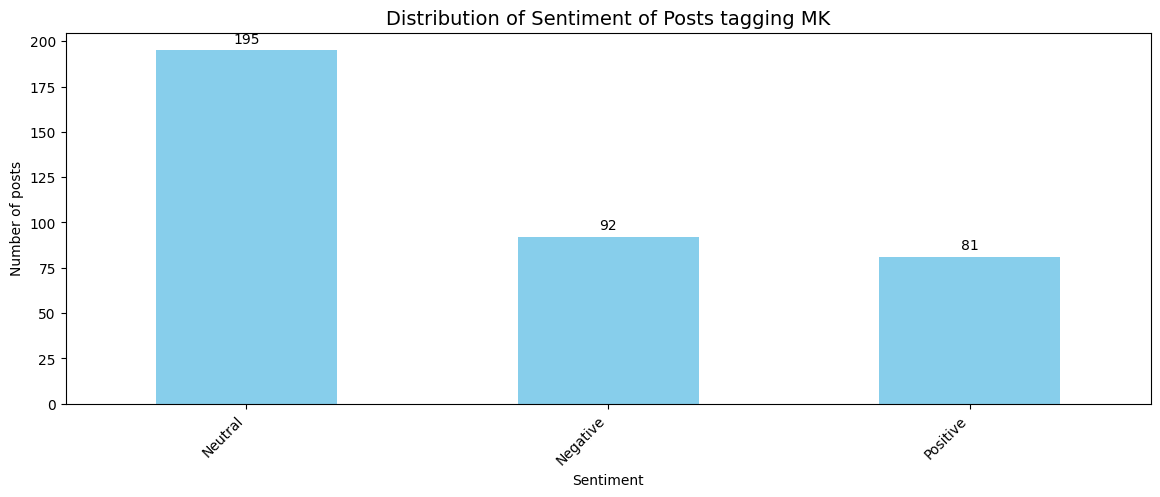

In [ ]:

# 1. Get the distribution
manip_dist = mk_mentions_posts["post sentiment"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Sentiment of Posts tagging MK", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()


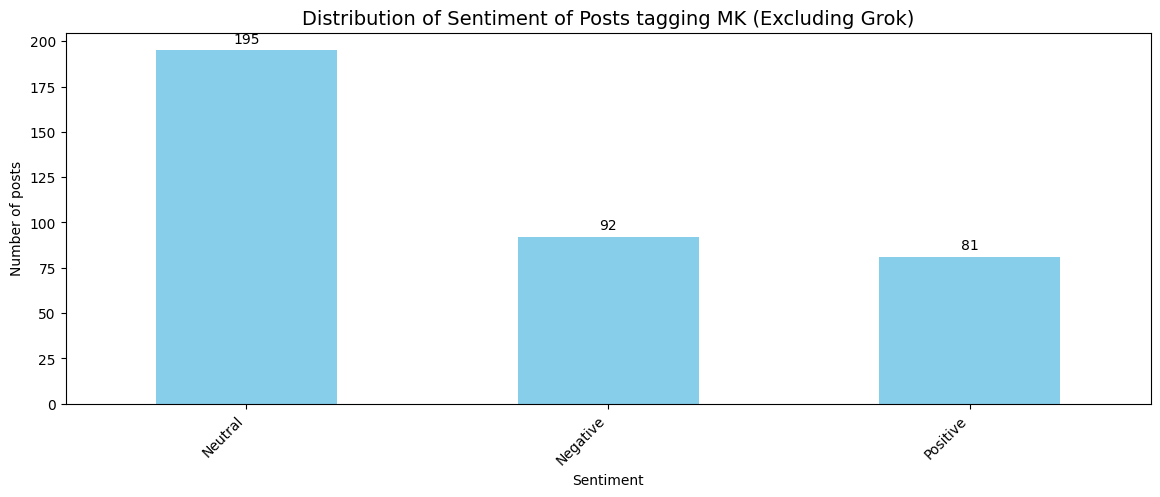

In [ ]:
# 1. Get the distribution, excluding posts from 'grok'
manip_dist = mk_mentions_posts[mk_mentions_posts['post author'] != 'grok']["post sentiment"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Sentiment of Posts tagging MK (Excluding Grok)", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()

In [ ]:
mk_mentions_posts[['text', 'sentiment', 'post author', 'emotion reply']].iloc[240].values

array(['RT @Urban_Ug1: The president and the president in waiting in one frame!!\n@KagutaMuseveni X @mkainerugaba https://t.co/d6WqctIYDU',
       np.float64(nan), 'NathanNuwagira2', 'neutral'], dtype=object)

/tmp/ipython-input-3477507102.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3477507102.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


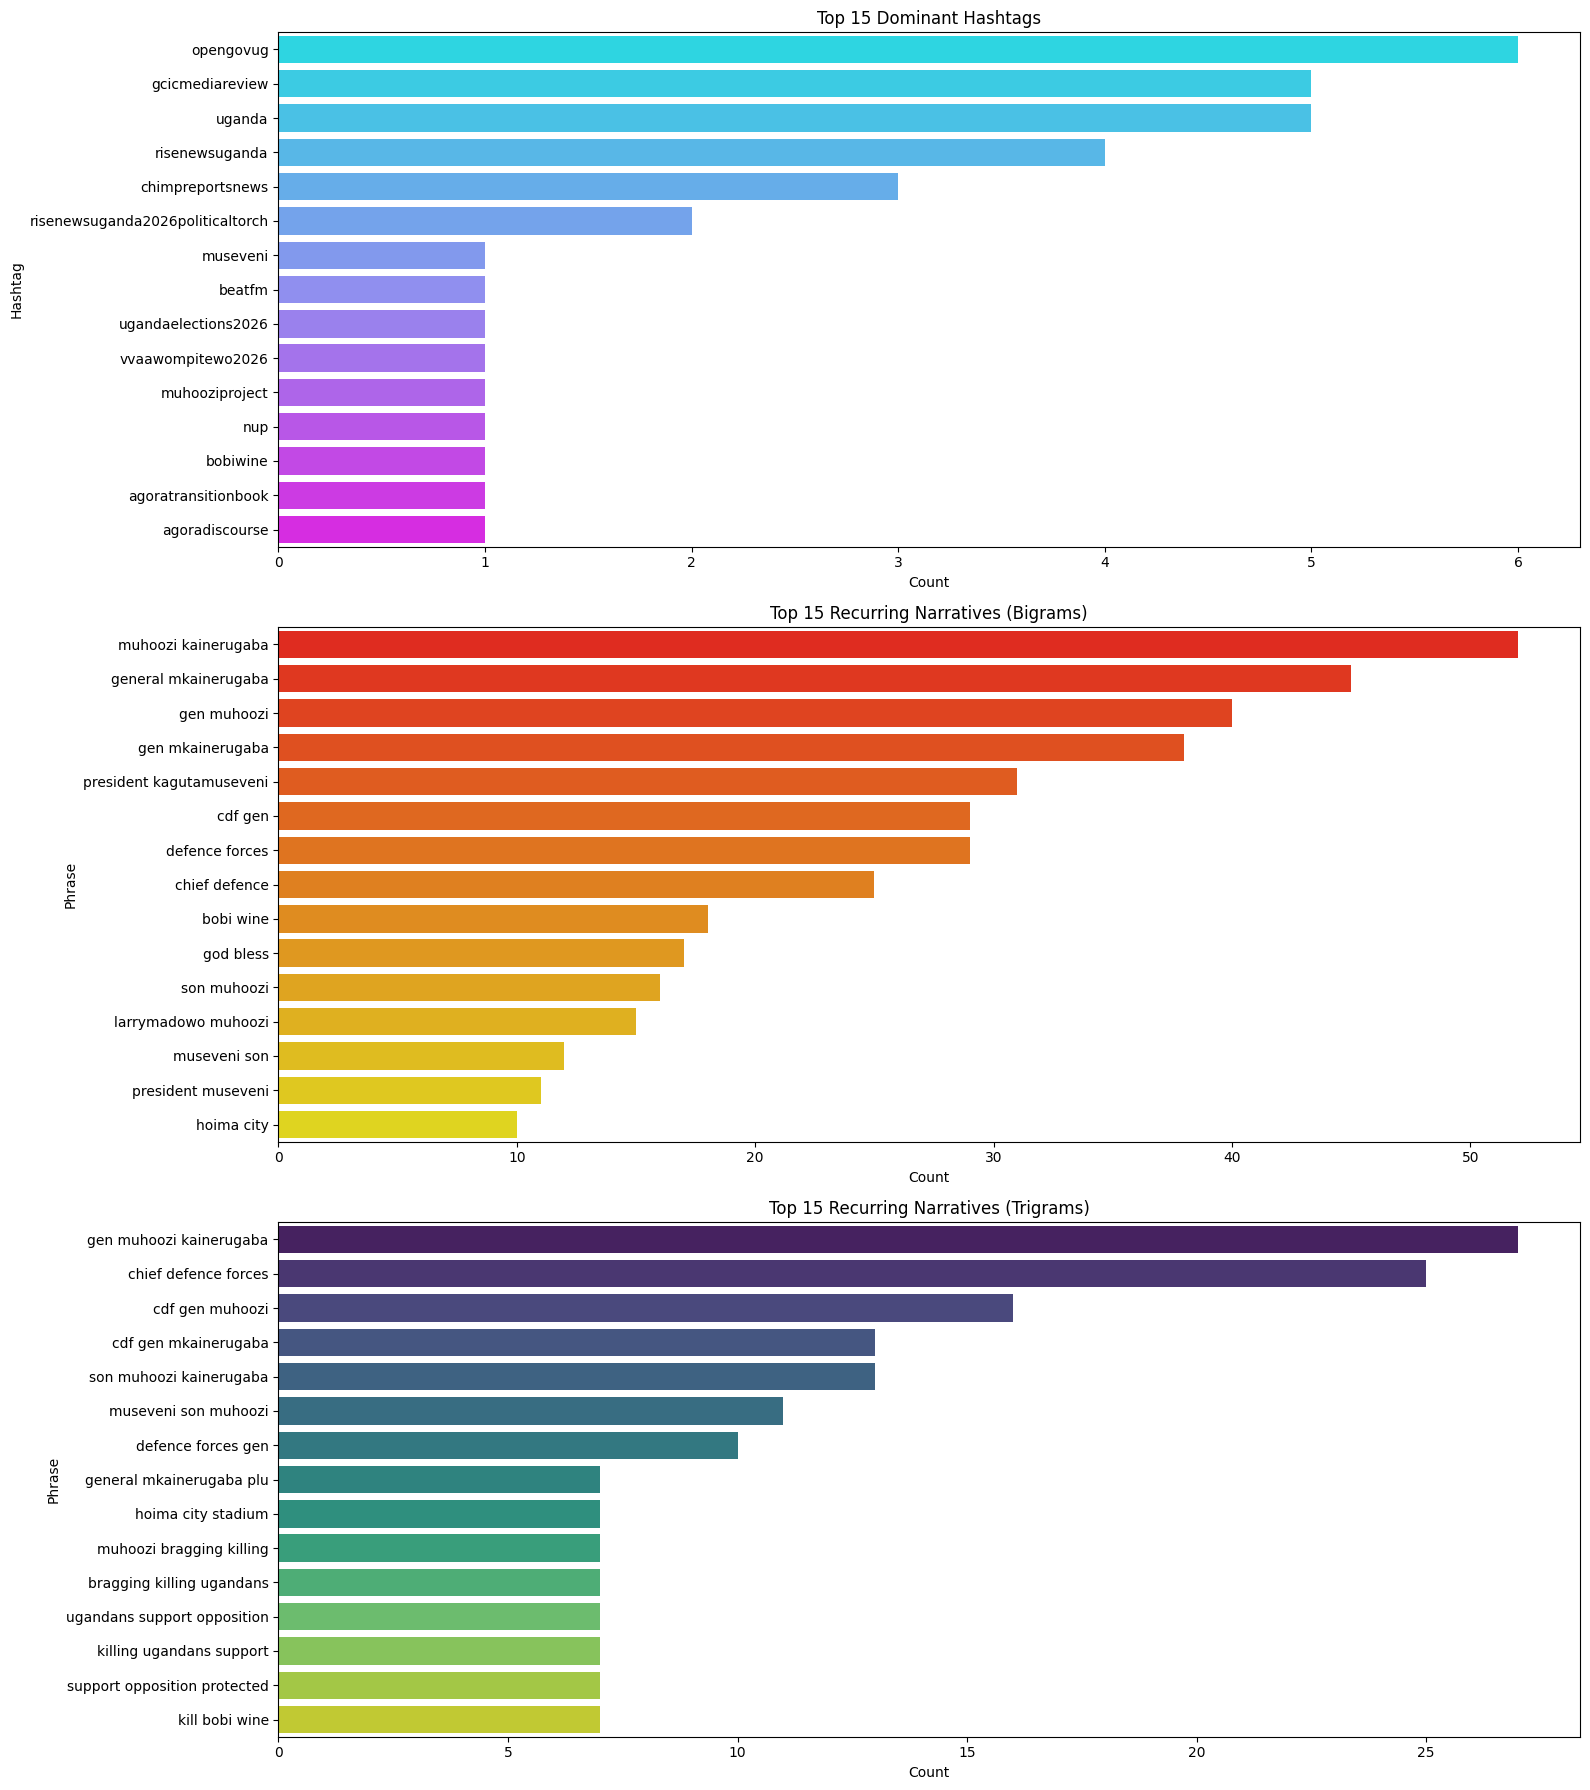

In [ ]:
plot_hashtags_bigrams_trigrams(mk_mentions_posts, 'text')

post author
BalaamBarugahar    69
NathanNuwagira2    31
DaudiKabanda       25
KabbyangaB         17
rwomchechen        12
UGDiplomat         11
AnnahAshaba        11
annemugisha65      10
OgwangOgwang       10
Humanrights256      9
Name: count, dtype: int64


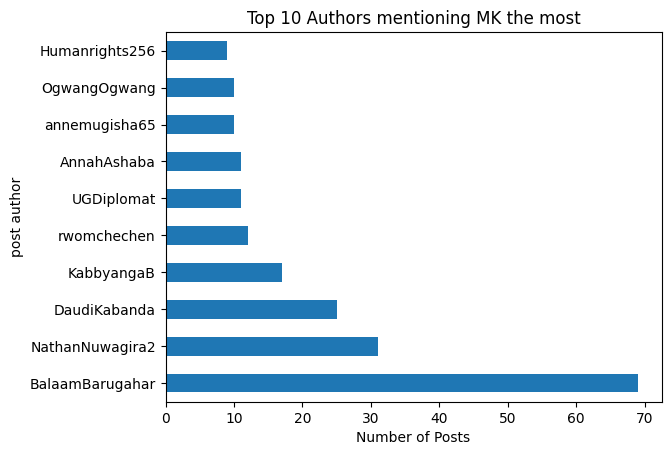

In [ ]:
# Count the number of posts per page/user
top_posters = mk_mentions_posts['post author'].value_counts().head(10)

print(top_posters)

# Visualization
top_posters.plot(kind='barh', title='Top 10 Authors mentioning MK the most')
plt.xlabel('Number of Posts')
plt.show()

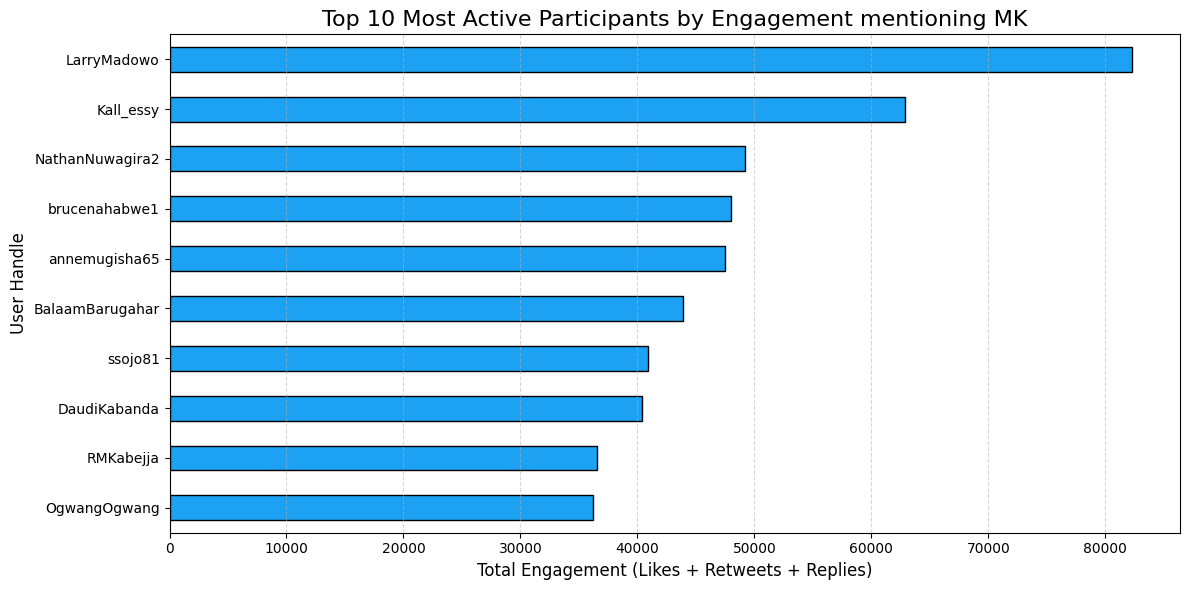

In [ ]:
metrics = ['retweetCount', 'replyCount_x', 'likeCount', 'quoteCount_x']

mk_mentions_posts[metrics] = mk_mentions_posts[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

mk_mentions_posts['total_engagement'] = mk_mentions_posts[metrics].sum(axis=1)

top_engaged = mk_mentions_posts.groupby('post author')['total_engagement'].sum()

top_10_engaged = top_engaged.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

top_10_engaged.sort_values(ascending=True).plot(
    kind='barh',
    color='#1DA1F2',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement mentioning MK', fontsize=16)
plt.xlabel('Total Engagement (Likes + Retweets + Replies)', fontsize=12)
plt.ylabel('User Handle', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

### MK emotions analysis

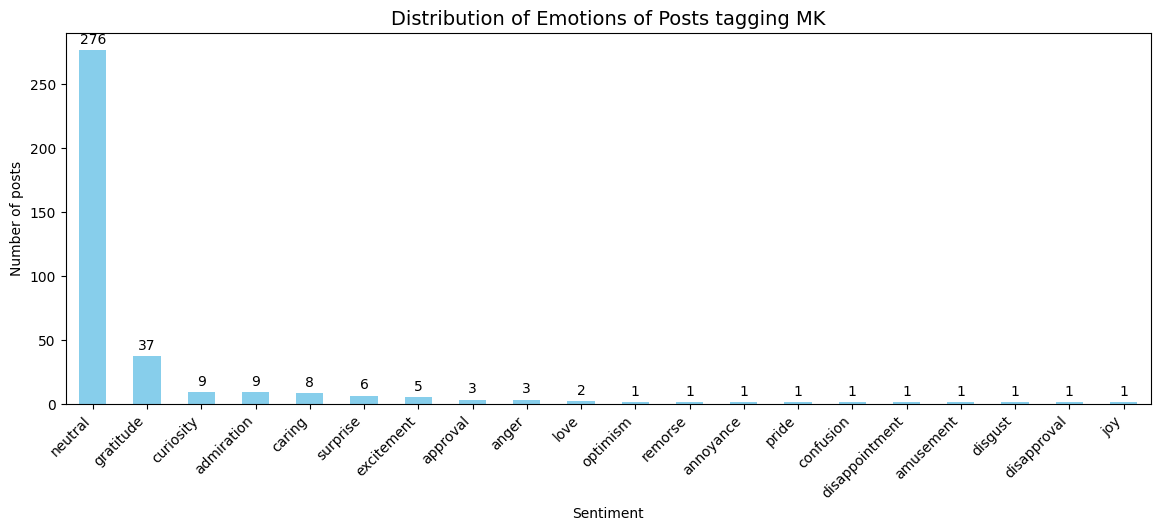

In [ ]:

# 1. Get the distribution
manip_dist = mk_mentions_posts["emotion reply"].value_counts()

# 2. Create a larger figure FIRST
plt.figure(figsize=(14, 7))  # wider figure for long labels

# 3. Create the bar plot
ax = manip_dist.plot(kind="bar", color="skyblue")

# 4. Add counts on top of bars
ax.bar_label(ax.containers[0], padding=3)

# 5. Styling and labels
plt.title("Distribution of Emotions of Posts tagging MK", fontsize=14)
plt.ylabel("Number of posts")
plt.xlabel("Sentiment")

# 6. Rotate labels and align
plt.xticks(rotation=45, ha="right")

# 7. Extra margin at bottom for long labels
plt.subplots_adjust(bottom=0.35)

plt.show()
